<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/Band%C4%B1rma_AirQualityIndex_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **VERİ SETİ**

Bandırma Air Quality Dataset (2021–2024)
Bu veri seti, Türkiye'nin Balıkesir ili Bandırma ilçesinde 2021-2024 yılları arasında ölçülen saatlik hava kirletici ve meteoroloji verilerine aittir.

35.064 (saatlik) gözlem ve 11 sütundan oluşmaktadır.

Zaman Boyutu: year, month, day, hour sütunlarıyla belirtilmiş (Henüz datetime tipine çevrilmemiş)

Kirletici Değişkenler (µg/m³):

pm10: Partikül Madde (10 mikron)

so2: Kükürt Dioksit

no2: Azot Dioksit

o3 : Ozon (Troposferik)

Meteorolojik Değişkenler:

temp : Sıcaklık

dwpt : Çiy Noktası

rhum : Bağıl Nem

prcp : Yağış

wdir : Rüzgar Yönü

wspd : Rüzgar Hızı

pres : Basınç


Kaynak:

T.C. Çevre Şehircilik ve İklim Değişikliği Bakanlığı, resmi internet sitesi url :
https://sim.csb.gov.tr/

https://dev.meteostat.net/python/hourly.html#example

https://meteostat.net/


Bandırma Air Quality Dataset (2021–2024)

Bu veri seti, Türkiye'nin Balıkesir ili Bandırma ilçesinde 2021-2024 yılları arasında ölçülen saatlik hava kirletici ve meteoroloji verilerine aittir.

35.064 (saatlik) gözlem ve 11 sütundan oluşmaktadır.

Sütunlar

datetime: Ölçüm zaman

**pm10** (Partikül Madde 10 mikron), **so2** (Kükürt Dioksit), **no2** (Azot Dioksit), **o3** (Ozon – Troposferik): Kirletici konsantrasyonları (µg/m³)

temp (sıcaklık), dwpt (çiy noktası), rhum (bağıl nem), prcp (yağış), wdir (rüzgar yönü), wspd (rüzgar hızı), pres (basınç): Meteoroloji verileri

Kaynak:

T.C. Çevre Şehircilik ve İklim Değişikliği Bakanlığı, resmi internet sitesi url :
https://sim.csb.gov.tr/

https://dev.meteostat.net/python/hourly.html#example

https://meteostat.net/


In [ ]:
!pip install meteostat

# Import Meteostat library and dependencies
from datetime import datetime
from meteostat import Hourly

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2025, 1, 1, 1, 0)

# Get hourly data
datam = Hourly('17115', start, end)  # 17115 Station Identifiers BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# Print DataFrame
print(datam)
datam = Hourly('17115', start, end)  # 17115 Station Identifiers BANDIRMA TANIMLAYICI KODU
datam = datam.fetch()

# Print DataFrame
print(datam)

                     temp  dwpt   rhum  prcp  snow   wdir  wspd  wpgt    pres  tsun  coco
time                                                                                     
2021-01-01 00:00:00  11.9   9.5   85.0   NaN   NaN  180.0  18.4   NaN  1014.5   NaN  17.0
2021-01-01 01:00:00  11.0   9.1   88.0   NaN   NaN  260.0  14.8   NaN  1014.0   NaN  17.0
2021-01-01 02:00:00  11.0  10.1   94.0   NaN   NaN  150.0   7.6   NaN  1014.0   NaN  17.0
2021-01-01 03:00:00  10.1   9.2   94.0   NaN   NaN  170.0   9.4   NaN  1014.6   NaN  17.0
2021-01-01 04:00:00  11.0  10.1   94.0   NaN   NaN  220.0   7.6   NaN  1015.0   NaN  17.0
...                   ...   ...    ...   ...   ...    ...   ...   ...     ...   ...   ...
2024-12-31 21:00:00   2.1   1.7   97.0   0.0   NaN    0.0   0.0   NaN  1033.4   NaN   1.0
2024-12-31 22:00:00   1.0   1.0  100.0   0.0   NaN  100.0   1.8   NaN  1032.0   NaN   5.0
2024-12-31 23:00:00   1.0   1.0  100.0   0.0   NaN  260.0   1.8   NaN  1033.0   NaN   5.0
2025-01-01

#Keşifsel Veri Analizi (Exploratory Data Analysis)

##Veri Yükleme ve İnceleme

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [65]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "Bandirma_AQ.xlsx"

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fkarabas/bandirma-aqi-2021-2024",
  file_path,)


In [66]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85,0.0,180.0,18.4,1014.5
1,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88,NaN,260.0,14.8,1014.0
2,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94,NaN,150.0,7.6,1014.0
3,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94,NaN,170.0,9.4,1014.6
4,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94,NaN,220.0,7.6,1015.0


In [67]:
df.shape  # (satır sayısı, sütun sayısı)

(35064, 15)

In [68]:
df.sample(6)  # Rastgele belirlenen sayıda satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
6129,2021,9,13,9,33.36,4.90,32.92,65.13,23.1,16.2,65,0.0,30.0,29.5,1012.7
12679,2022,6,13,7,20.71,8.08,25.76,63.54,22.0,16.9,73,0.0,30.0,11.2,1010.0
19177,2023,3,11,1,NaN,13.84,19.87,NaN,15.0,10.0,72,0.0,210.0,25.9,1003.0
25915,2023,12,16,19,19.40,20.90,25.91,NaN,7.0,5.0,87,0.5,40.0,61.2,1029.0
21262,2023,6,5,22,52.61,6.35,36.81,NaN,17.0,15.0,88,0.0,40.0,18.4,1018.0
547,2021,1,23,19,33.01,4.36,13.41,60.55,12.0,7.1,72,0.0,190.0,22.3,1015.8


In [69]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm10    32366 non-null  float64
 5   so2     33940 non-null  float64
 6   no2     33945 non-null  float64
 7   o3      22884 non-null  float64
 8   temp    35064 non-null  float64
 9   dwpt    35064 non-null  float64
 10  rhum    35064 non-null  int64  
 11  prcp    34778 non-null  float64
 12  wdir    35035 non-null  float64
 13  wspd    35064 non-null  float64
 14  pres    34902 non-null  float64
dtypes: float64(10), int64(5)
memory usage: 4.0 MB


10.satırda [rhum] sütun değerleriniveri tipi "int64" olarak gelmiş bunu "float64" olarak değiştiryorum.

In [70]:
df['rhum'] = df['rhum'].astype('float64')

In [71]:
df.dtypes

,0
year,int64
month,int64
day,int64
hour,int64
pm10,float64
so2,float64
no2,float64
o3,float64
temp,float64
dwpt,float64


In [72]:
df.nunique()

,0
year,4
month,12
day,31
hour,24
pm10,8934
so2,3184
no2,7854
o3,9691
temp,404
dwpt,345


In [73]:
# Tüm sütunların gösterilmesi ve ekran genişliğinin arttırılması
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # DataFrame'in çok satıra bölünmesini engeller
pd.set_option('display.width', None)           # Genişliği sınırlama

# Define the lists of pollutant and meteorological variables
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
selected_cols = kirleticiler + meteorolojik

df_selected = df[selected_cols]

print(df_selected.describe().T)

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


| Değişken | Ortalama | Standart Sapma | Min–Maks    | Açıklama                                                                                                                                             |
| -------- | -------- | -------------- | ----------- | ---------------------------------------------------------------------------------------------------------------------------------------------------- |
| **pm10** | 43.26    | 25.31          | 0.31–320.89 | Ortalama seviyede ancak bazı ekstrem (yüksek) değerler mevcut. Sağlık sınırlarını aşabilecek günler olabilir.                                        |
| **so2**  | 8.26     | 7.44           | 0.00–209.86 | Genellikle düşük ama bazı zirve değerler (örneğin 209) ciddi kaynaklı emisyonlara işaret edebilir.                                                   |
| **no2**  | 31.75    | 20.42          | 0.38–178.03 | Ortalama düzeyde azot dioksit var, trafiğin yoğun olduğu saatler/süreçler araştırılabilir.                                                           |
| **o3**   | 54.21    | 30.29          | 1.28–192.34 | Ozon değerleri yüksek değişkenlik göstermektedir, mevsimsel etkilerle ilişkili olabilir. Ayrıca eksik veri oranı yüksektir (12.000'den fazla eksik). |


| Değişken         | Ortalama | Standart Sapma | Min–Maks     | Açıklama                                                                             |
| ---------------- | -------- | -------------- | ------------ | ------------------------------------------------------------------------------------ |
| **temp (°C)**    | 15.52    | 8.12           | -8.3–43.0    | Doğal bir dağılım, mevsim geçişlerine uygun.                                         |
| **dwpt (°C)**    | 10.79    | 6.54           | -9.5–27.0    | Çiy noktası sıcaklığı beklenen aralıklarda.                                          |
| **prcp (mm)**    | 0.07     | 0.38           | 0.0–11.7     | Çok sayıda sıfır değer (yağışsız saat), yağışın az ve seyrek olduğu görülüyor.       |
| **wdir (°)**     | 118.63   | 115.66         | 0–360        | Rüzgar yönü tam dairesel kapsamda (360°) ölçülmüş. Ortalama batı–güneybatı arası.    |
| **wspd (km/s?)** | 16.27    | 11.48          | 0.0–74.2     | Rüzgar hızı çok değişken, bazı ekstrem değerler fırtınalı koşulları işaret edebilir. |
| **pres (hPa)**   | 1015.91  | 6.42           | 980.0–1038.2 | Basınç normal atmosfer aralığında, ölçüm güvenilir gözüküyor.                        |


📌 Genel Değerlendirme

Eksik veri sorunu özellikle pm10, o3, ve prcp değişkenlerinde dikkat çekmektedir.

Aykırı değerler pm10, so2, no2, ve wspd gibi değişkenlerde yüksek sapma ve maks. değerlerde görülmektedir → İleride aykırı değer analizi yapılmalı.

Mevsimsel desen analizi yapılması uygun görünüyor çünkü sıcaklık, rüzgar, basınç gibi meteorolojik değişkenlerde yıllık varyasyonlar belirgin olabilir.

Ozon (O₃) seviyelerinin özellikle yaz dönemlerinde ve sıcaklıkla birlikte nasıl değiştiği incelenmeli çünkü sağlık etkileri oldukça belirgindir.

##Eksik Veri Analizi ve Temizleme

### Zaman serisi analizi için veri seti hazırla.

In [74]:
# year, month, day ve hour sütunlarını birleştirerek datetime değişkeni oluştur
df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

# datetime değişkenini veri setinin en başına alalım
cols = ["datetime"] + [col for col in df.columns if col != "datetime"]
df = df[cols]

# datetime'e göre sıralayalım
df = df.sort_values("datetime").reset_index(drop=True)

# Yeni yapıyı göster
df.head()

,datetime,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021-01-01 00:00:00,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85.0,0.0,180.0,18.4,1014.5
1,2021-01-01 01:00:00,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88.0,NaN,260.0,14.8,1014.0
2,2021-01-01 02:00:00,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94.0,NaN,150.0,7.6,1014.0
3,2021-01-01 03:00:00,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94.0,NaN,170.0,9.4,1014.6
4,2021-01-01 04:00:00,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94.0,NaN,220.0,7.6,1015.0


In [75]:
# Eksik veri sayısı ve oranı
eksik = df.isnull().sum()
oran = 100 * df.isnull().mean()

# Sadece eksik değeri olanları yazdır
print(pd.DataFrame({'Eksik veri Sayısı': eksik, 'Oran (%)': oran.map(lambda x: f'{x:.3f}')})[eksik > 0])

      Eksik veri Sayısı Oran (%)
pm10               2698    7.695
so2                1124    3.206
no2                1119    3.191
o3                12180   34.736
prcp                286    0.816
wdir                 29    0.083
pres                162    0.462


 Sonuçlara göre özellikle O₃ (ozon) değişkeninde ciddi eksiklik (%34,7), diğer değişkenlerde ise %1–8 arasında eksiklikler mevcut.

EKSİK VERİLERİN ZAMAN DESENİ

 Saatlik Eksik Veri Deseni

<Figure size 1200x600 with 0 Axes>

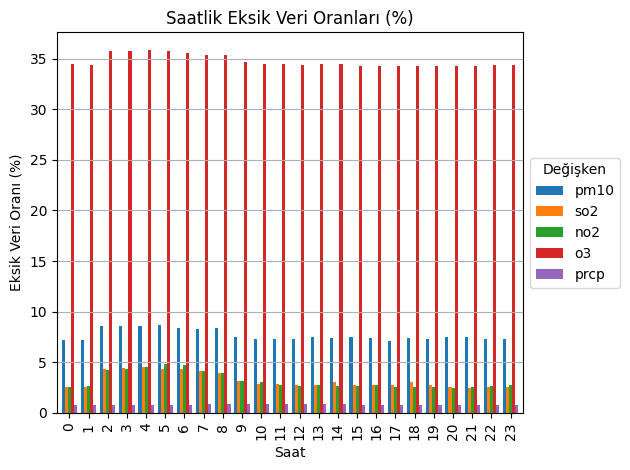

In [77]:
# Saatlik eksik veri oranlarını yeniden hesaplayalım
saatlik_eksik = df.groupby("hour")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Bar plot çizimi
plt.figure(figsize=(12, 6))
saatlik_eksik.plot(kind='bar', width=0.8)
plt.title("Saatlik Eksik Veri Oranları (%)")
plt.xlabel("Saat")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

🕒 Saatlik Eksik Veri Deseni  

Gece saatlerinde (00:00–05:00) pm10, so2, no2 gibi kirletici gazlarda eksik veri oranı belirgin şekilde artmaktadır.

🔹 Muhtemel neden: Otomatik ölçüm sistemlerinin devre dışı kalması veya bakım süreçleri.

o3 (ozon) değişkeni günün tüm saatlerinde %30 civarında eksik; bu da sistematik bir eksiklik olduğunu göstermektedir.

🔹 Muhtemel neden: Sensör arızası, veri kaybı ya da cihaz hassasiyet sorunları.

prcp (yağış) verisi tüm saatlerde istikrarlı ve güvenilir; eksiklik oranı düşüktür.

🟡 Bu desenler, eksik verilerin rastgele değil, belirli saat dilimlerinde yoğunlaştığını göstermekte; dolayısıyla zaman duyarlı tamamlama yöntemleri tercih edilmelidir.

📌 Genel Öneri:

pm10, so2, no2 için gece saatlerine özel eksik değer tamamlama yöntemleri (örneğin benzer günlerdeki aynı saatlerin ortalaması) uygulanabilir.

o3 için daha gelişmiş bir yöntem (ör. IterativeImputer + pozitif regresör) kaçınılmazdır.

**Günlük Eksik Veri Deseni**

<Figure size 1200x600 with 0 Axes>

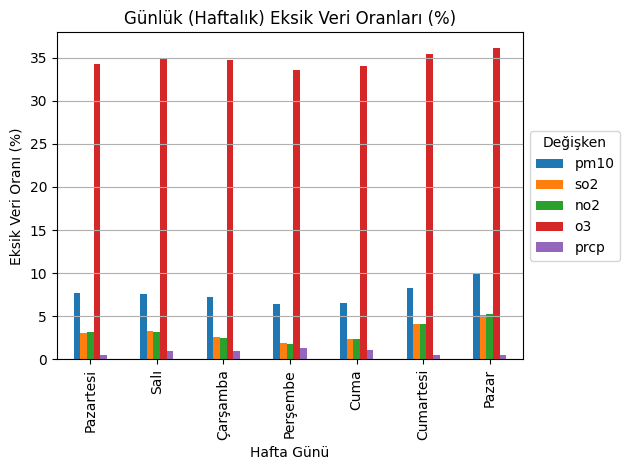

In [78]:
# Gün bilgisi ekleyelim
df["weekday"] = df["datetime"].dt.dayofweek  # Pazartesi = 0, Pazar = 6
hafta_gunleri = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
df["hafta_gunu"] = df["weekday"].apply(lambda x: hafta_gunleri[x])

# Günlük (haftalık) eksik veri oranlarını hesaplayalım
gunluk_eksik = df.groupby("hafta_gunu")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Günleri haftalık sıraya göre sıralayalım
gunluk_eksik = gunluk_eksik.reindex(hafta_gunleri)

# Bar plot ile görselleştirelim
plt.figure(figsize=(12, 6))
gunluk_eksik.plot(kind='bar')
plt.title("Günlük (Haftalık) Eksik Veri Oranları (%)")
plt.xlabel("Hafta Günü")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


🟢 Genel Gözlemler:
pm10, so2, no2 değişkenlerinde hafta sonu (Cumartesi–Pazar) eksiklik oranı belirgin şekilde artmaktadır.

o3 değişkeni ise hafta boyunca yüksek ve sabit eksiklik oranı (~%30) göstermektedir.

prcp değişkeni yine tüm günlerde düşük eksik oranı ile dikkat çekmektedir.

📌 Özet:
Eksik veriler rastgele dağılmamakta, hafta sonlarında artış göstermektedir. Bu da veri eksikliği yönetiminde zaman-temelli stratejilerin (örn. hafta içi ve sonu ayrı ele alma) önemini ortaya koymaktadır.

**Aylık Eksik Veri Deseni**

<Figure size 1200x600 with 0 Axes>

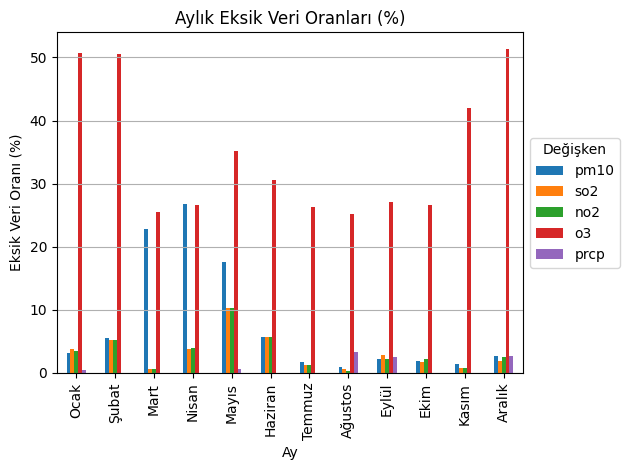

In [79]:
# Aylık eksik veri oranlarını yeniden hesaplayalım
aylik_eksik = df.groupby("month")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Ay isimleri listesi
ay_isimleri = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
               'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
aylik_eksik.index = ay_isimleri

# Bar plot çizimi
plt.figure(figsize=(12, 6))
aylik_eksik.plot(kind='bar')
plt.title("Aylık Eksik Veri Oranları (%)")
plt.xlabel("Ay")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

📅 Aylık Eksik Veri Deseni

o3 (Ozon):
En yüksek eksiklik kış ve sonbahar aylarında (Ocak, Şubat, Kasım, Aralık) görülmektedir (%40’un üzerinde).

🔹 Olası neden: Soğuk hava, düşük güneş ışınımı veya sensör performans sorunları.

pm10, so2, no2:
Eksiklik oranı kış aylarında (Ocak, Şubat, Aralık) artış göstermektedir.

🔹 Olası neden: Cihaz donmaları, bakım eksiklikleri, çevresel koşullar.

prcp (Yağış):
Tüm aylarda eksiklik oranı düşüktür ve verisi güvenilirdir.


📌 Ana Mesaj:

Eksik veriler mevsimsel olarak değişkenlik göstermektedir. Kış aylarında eksiklikler belirginleşmektedir. Bu nedenle, veri tamamlama stratejileri mevsime duyarlı şekilde planlanmalıdır.

**Mevsimlik Eksik Veri Deseni**

<Figure size 1000x600 with 0 Axes>

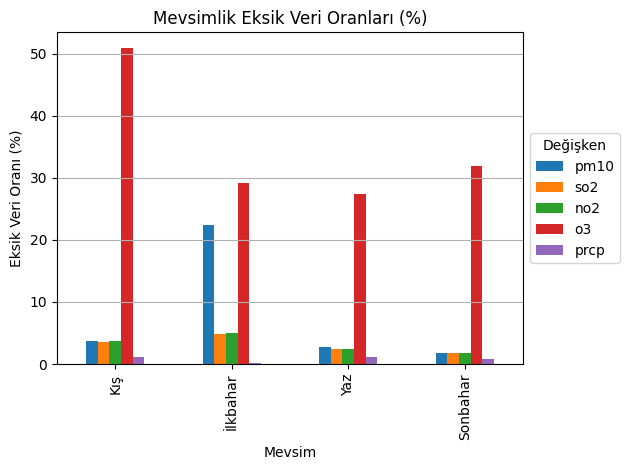

In [80]:
# Mevsim tanımlama fonksiyonunu tekrar oluşturalım
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# 'mevsim' sütununu yeniden oluştur
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# Mevsimlik eksik veri oranlarını hesapla
mevsim_eksik = df.groupby("mevsim")[['pm10', 'so2', 'no2', 'o3', 'prcp']].apply(lambda x: x.isnull().mean() * 100)

# Mevsimleri sıralayalım
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
mevsim_eksik = mevsim_eksik.reindex(mevsim_sirasi)

# Bar plot çizimi
plt.figure(figsize=(10, 6))
mevsim_eksik.plot(kind='bar')
plt.title("Mevsimlik Eksik Veri Oranları (%)")
plt.xlabel("Mevsim")
plt.ylabel("Eksik Veri Oranı (%)")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


📌 Genel Değerlendirme:

Kış ve sonbahar aylarında eksik veri oranları tüm kirletici gazlar için yükselmektedir. Bu durum mevsimsel etkilerin sensör performansı üzerinde belirleyici olduğunu ve mevsime özel veri tamamlama yöntemlerinin zorunlu hale geldiğini açıkça göstermektedir.

🔁 IterativeImputer (Çoklu İtalyatif İmputasyon / MICE)

MICE (Multiple Imputation by Chained Equations), eksik verileri istatistiksel modelleme yoluyla dolduran bir yöntemdir. scikit-learn kütüphanesindeki IterativeImputer sınıfı bu yöntemin bir uygulamasıdır.

🧠 Nasıl Çalışır?

Her bir eksik sütun için regresyon modeli oluşturur.

Diğer sütunları bağımsız değişken (X), eksik sütunu bağımlı değişken (y) olarak kullanır.

Eksik değerleri tahmin eder ve yerine koyar.

Bu işlem tüm eksik sütunlar için sırasıyla tekrarlanır.

Birkaç iterasyon boyunca bu süreç döner ve değerler iyileştirilir.

✅ Avantajları

Mevsimsel veya çok değişkenli yapıları dikkate alır.

Tek boyutlu doldurmalardan (ortalama, medyan gibi) daha isabetlidir.

Özellikle eksiklik karmaşık desenler izliyorsa çok etkilidir.

❗ Dikkat Edilmesi Gerekenler

Tahmin modelleri (default: BayesianRidge) varsayımsal olabilir, modeller dikkatle seçilmeli.

Zaman serisi doğasında veri kaçağını (data leakage) önlemek için ileri-geri veri erişimi iyi yönetilmelidir.

Yüksek boyutlu veri için hesaplama maliyeti yüksektir.



XGBoost tabanlı imputasyon kirleticiler = ['pm10', 'so2', 'no2', 'o3'] için

In [81]:
# Gerekli kütüphaneler
!pip install xgboost  # Google Colab için
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from xgboost import XGBRegressor

# Kirletici ve meteorolojik değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
input_cols = kirleticiler + meteorolojik

# Veri çerçevesi (örnek olarak: df)
impute_df = df[input_cols].copy()

# XGBoost tabanlı imputasyon
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# Eksik verileri tahmin et
imputed_array = imputer.fit_transform(impute_df)

# DataFrame'e aktar ve negatif değerleri düzelt
imputed_df = pd.DataFrame(imputed_array, columns=input_cols)
for col in kirleticiler:
    imputed_df[col] = imputed_df[col].apply(lambda x: max(x, 0))

# Orijinal veri setine aktar
for col in kirleticiler:
    df[col] = imputed_df[col]


XGBoost tabanlı imputasyon meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']  # 'wdir' hariç için

In [82]:
# Meteorolojik sütunları belirle
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']  # 'wdir' hariç
df_meteo = df[meteorolojik].copy()

# Imputer'ı tanımla
imputer = IterativeImputer(
    estimator=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    max_iter=10,
    random_state=42
)

# Eksik verileri tahmin et
imputed_array = imputer.fit_transform(df_meteo)
df[meteorolojik] = pd.DataFrame(imputed_array, columns=meteorolojik)

# Negatif değer kontrolü (örneğin sıcaklıklar için)
for col in meteorolojik:
    df[col] = df[col].apply(lambda x: max(x, 0))


In [83]:
import numpy as np

# wdir eksik değerleri işlemek için sin-cos dönüşümü kullanalım

# Radyan dönüşümü
df['wdir_rad'] = np.deg2rad(df['wdir'])

# sin ve cos bileşenlerini oluştur
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# Eksik sin ve cos değerlerini zaman tabanlı interpolasyonla tamamlayalım
df = df.set_index('datetime')
df['wdir_sin'] = df['wdir_sin'].interpolate(method='time')
df['wdir_cos'] = df['wdir_cos'].interpolate(method='time')

# sin ve cos bileşenlerinden orijinal dereceye geri dönüş
df['wdir'] = (np.arctan2(df['wdir_sin'], df['wdir_cos']) * 180 / np.pi) % 360

# Geçici sütunları kaldıralım
df = df.drop(columns=['wdir_rad', 'wdir_sin', 'wdir_cos'])

# Eksik veri kalmış mı kontrol edelim
df['wdir'].isnull().sum()


np.int64(0)

In [84]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2021-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        35064 non-null  int64  
 1   month       35064 non-null  int64  
 2   day         35064 non-null  int64  
 3   hour        35064 non-null  int64  
 4   pm10        35064 non-null  float64
 5   so2         35064 non-null  float64
 6   no2         35064 non-null  float64
 7   o3          35064 non-null  float64
 8   temp        35064 non-null  float64
 9   dwpt        35064 non-null  float64
 10  rhum        35064 non-null  float64
 11  prcp        35064 non-null  float64
 12  wdir        35064 non-null  float64
 13  wspd        35064 non-null  float64
 14  pres        35064 non-null  float64
 15  weekday     35064 non-null  int32  
 16  hafta_gunu  35064 non-null  object 
 17  mevsim      35064 non-null  object 
dtypes: float64(11), int32(1), int64

In [85]:
print(df_selected.describe().T)

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


## Aykırı Değerler (Outliers)

In [86]:
from scipy.stats import zscore
import pandas as pd
from IPython.display import display # Import display

# Sayısal değişkenler üzerinde Z-score hesaplayalım
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
z_scores = df[numeric_cols].apply(zscore)

# Aykırı değerler: Z-score mutlak değeri > 3
z_outlier_counts = (z_scores.abs() > 3).sum()
total_counts = df[numeric_cols].count()
z_outlier_ratios = (z_outlier_counts / total_counts * 100).round(2)

# Özet tablo
z_outlier_summary = pd.DataFrame({
    'Aykırı Değer Sayısı (Z > 3)': z_outlier_counts,
    'Toplam Gözlem': total_counts,
    'Aykırı Oranı (%)': z_outlier_ratios
}).sort_values(by='Aykırı Oranı (%)', ascending=False)

# Use the standard display function instead of ace_tools
print("Z-Score Aykırı Değer Özeti:")
display(z_outlier_summary)

Z-Score Aykırı Değer Özeti:


,Aykırı Değer Sayısı (Z > 3),Toplam Gözlem,Aykırı Oranı (%)
prcp,532,35064,1.52
so2,521,35064,1.49
pm10,522,35064,1.49
no2,451,35064,1.29
o3,172,35064,0.49
wspd,116,35064,0.33
pres,116,35064,0.33
rhum,62,35064,0.18
temp,5,35064,0.01
dwpt,0,35064,0.00


| Değişken                     | Aykırı Oranı (%) | Açıklama                                                                                                  |
| ---------------------------- | ---------------- | --------------------------------------------------------------------------------------------------------- |
| **prcp**                     | **%1.52**        | Yağış verisi zaman zaman çok yoğun yağışları (ekstrem durumları) göstermekte, bu doğal mevsimsel etkidir. |
| **so2**, **pm10**            | **\~%1.49**      | Endüstriyel veya kentsel kaynaklı ani emisyon artışları olabilir.                                         |
| **no2**                      | %1.29            | Trafik yoğunluğu veya hava durgunluğu etkili olabilir.                                                    |
| **o3**                       | %0.49            | Fotokimyasal etkilerle bazı yaz günleri ani artışlar olabilir.                                            |
| **wspd**, **pres**           | %0.33            | Bazı saatlerde rüzgar ve basınç değerlerinde ani uç değerler olabilir.                                    |
| **temp**, **dwpt**, **wdir** | \~%0.00          | Sıcaklık, çiy noktası ve rüzgar yönü istikrarlı – nadiren ekstrem.                                        |



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



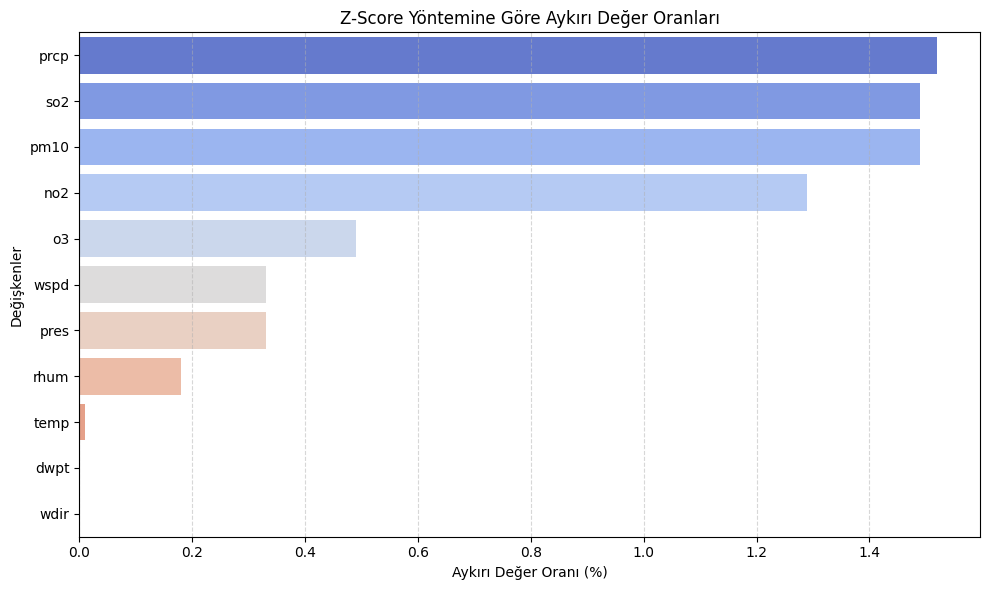

In [87]:
# Z-score tablosunu yeniden oluşturalım
z_outlier_summary = pd.DataFrame({
    'Değişken': ['prcp', 'so2', 'pm10', 'no2', 'o3', 'wspd', 'pres', 'rhum', 'temp', 'dwpt', 'wdir'],
    'Aykırı Oranı (%)': [1.52, 1.49, 1.49, 1.29, 0.49, 0.33, 0.33, 0.18, 0.01, 0.00, 0.00]
})

# Sıralama
z_outlier_summary = z_outlier_summary.sort_values('Aykırı Oranı (%)', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=z_outlier_summary, x='Aykırı Oranı (%)', y='Değişken', palette='coolwarm')
plt.title("Z-Score Yöntemine Göre Aykırı Değer Oranları")
plt.xlabel("Aykırı Değer Oranı (%)")
plt.ylabel("Değişkenler")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

🔍 Önemli Bulgular:

🌧️ Yağış (prcp) en yüksek aykırılık oranına (%1.52) sahiptir. Bu, mevsimsel aşırı yağışların modellemeyi bozabileceğini gösterir.

🧪 SO₂ (%1.49) ve PM10 (%1.49) yüksek oranda aykırı değer içeriyor → hava kirliliği anlık artışlar ve endüstriyel kaynaklı pik değerler oluşturabilir.

🚗 NO₂ (%1.29) trafiğin yoğun olduğu saatlerde aniden yükselebilir.

📉 O₃ (%0.49) daha kontrollü ama sıcak yaz saatlerinde zirve yapabilir.

🌡️ Sıcaklık (temp), çiy noktası (dwpt), rüzgar yönü (wdir) neredeyse hiç aykırı değer içermemekte → modellemeye çok uygundur.

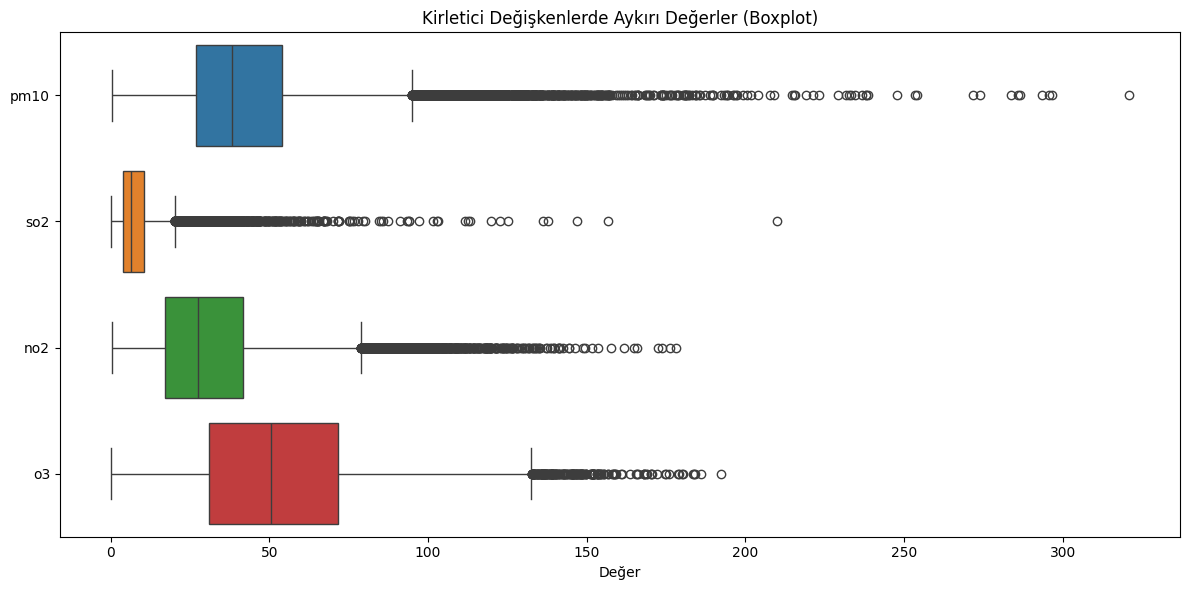

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kirletici değişkenler
kirleticiler = ['pm10', 'so2', 'no2', 'o3']

# Grafik ayarları
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[kirleticiler], orient='h')
plt.title("Kirletici Değişkenlerde Aykırı Değerler (Boxplot)")
plt.xlabel("Değer")
plt.tight_layout()
plt.show()


Tüm Değişkenlerde IQR Yöntemiyle Aykırı Değerlerin Mevsimsel Dağılımı

<Figure size 1400x800 with 0 Axes>

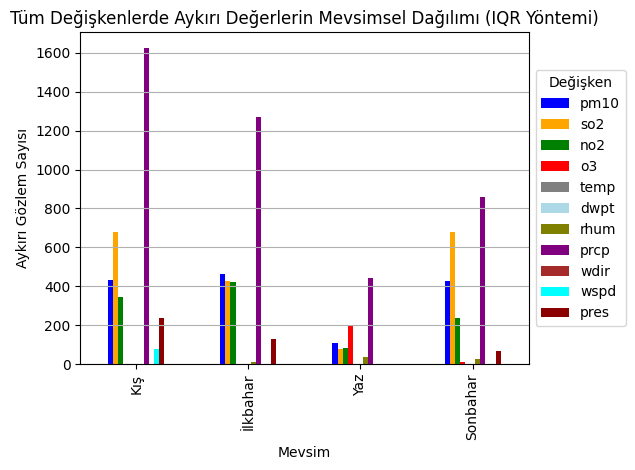

In [91]:
# Gerekli kütüphaneler
import pandas as pd
import matplotlib.pyplot as plt

df["datetime"] = pd.to_datetime(df[["year", "month", "day", "hour"]])

# Mevsim belirleme fonksiyonu
def ay_to_mevsim(ay):
    if ay in [12, 1, 2]:
        return "Kış"
    elif ay in [3, 4, 5]:
        return "İlkbahar"
    elif ay in [6, 7, 8]:
        return "Yaz"
    else:
        return "Sonbahar"

# Mevsim sütununu ekle
df["mevsim"] = df["datetime"].dt.month.apply(ay_to_mevsim)

# İncelenecek tüm sayısal değişkenler (kirleticiler + meteorolojik)
tum_deg = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# IQR yöntemiyle aykırı değer tespiti ve etiketleme
for col in tum_deg:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col + '_aykiri'] = ((df[col] < lower) | (df[col] > upper)).astype(int)

# Mevsime göre aykırı değerlerin toplamını hesapla
aykiri_mevsim = df.groupby('mevsim')[[col + '_aykiri' for col in tum_deg]].sum()

# Kolon adlarını sadeleştir
aykiri_mevsim.columns = tum_deg

# Mevsimleri sıralı hale getir
mevsim_sirasi = ["Kış", "İlkbahar", "Yaz", "Sonbahar"]
aykiri_mevsim = aykiri_mevsim.reindex(mevsim_sirasi)

# Görselleştirme
plt.figure(figsize=(14, 8))
renkler = ['blue', 'orange', 'green', 'red', 'gray', 'lightblue', 'olive', 'purple', 'brown', 'cyan', 'darkred']
aykiri_mevsim.plot(kind='bar', color=renkler)
plt.title("Tüm Değişkenlerde Aykırı Değerlerin Mevsimsel Dağılımı (IQR Yöntemi)")
plt.xlabel("Mevsim")
plt.ylabel("Aykırı Gözlem Sayısı")
plt.grid(axis='y')
plt.legend(title="Değişken", loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

📌 Açıklamalar:

🟦 Kirletici Değişkenler (pm10, so2, no2, o3)

Kış ve Sonbahar aylarında pm10, so2, no2 aykırılıkları oldukça yüksek → Isınma kaynaklı emisyonlar etkili.

Yaz ayında o3 aykırı değerleri dikkat çekici → Güneş ışınımı + sıcaklık nedeniyle ozon üretimi.

🔵 Meteorolojik Değişkenler

prcp (yağış) mevsimsel aykırılıkta en belirgin değişkendir: Kış ve ilkbaharda çok yüksek.

pres (basınç) yine kış ve ilkbahar aylarında anormal varyasyonlar göstermekte.

wspd (rüzgar hızı) ve rhum (bağıl nem) değişkenlerinde de mevsimsel sapmalar mevcut.

🔴 Açısal veri olan wdir için IQR yöntemi anlamlı bir sonuç üretmedi (sıfır aykırı gözlem) → bu beklenen bir durumdur.


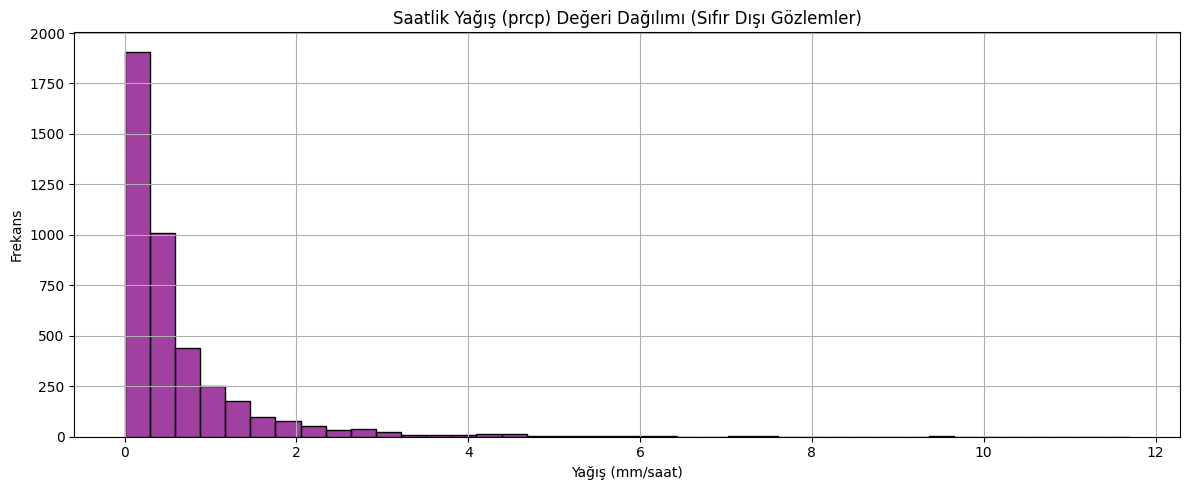

In [ ]:
# 0 olmayan saatlik yağış verisini filtrele
df_prcp = df[df['prcp'] > 0].copy()

#  Histogram (yağış dağılımı - genel)
plt.figure(figsize=(12, 5))
sns.histplot(df_prcp["prcp"], bins=40, kde=False, color="purple")
plt.title("Saatlik Yağış (prcp) Değeri Dağılımı (Sıfır Dışı Gözlemler)")
plt.xlabel("Yağış (mm/saat)")
plt.ylabel("Frekans")
plt.grid(True)
plt.tight_layout()
plt.show()

prcp Değişkeni Nedir?

prcp (precipitation), meteorolojik veri setlerinde yağış miktarını ifade eder.
Veri türü genellikle milimetre (mm) cinsindendir ve saatlik gözlemler için şu şekilde anlamlandırılır:

| `prcp` Değeri (mm/saat) | Anlamı                                         |
| ----------------------- | ---------------------------------------------- |
| `0.0`                   | Yağış yok (kuru saat)                          |
| `0.1 – 0.5`             | Çok hafif yağmur                               |
| `0.6 – 2.5`             | Hafif yağmur                                   |
| `2.6 – 7.6`             | Orta şiddette yağmur                           |
| `>7.6`                  | Şiddetli yağmur, sağanak                       |
| `>10`                   | Muhtemelen kısa süreli fırtına / yoğun sağanak |


📈 Histogram (Yağış Dağılımı – Sıfır Dışı Değerler)

Çoğu saatlik yağış değeri 0–2 mm aralığında yoğunlaşmıştır. Daha yüksek yağışlar (5 mm, 10 mm ve üstü) nadirdir ama mevcuttur. Bu dağılım, pozitif sağa çarpık (right-skewed) yapıdadır.

Saatlik yağışlar genellikle kısa süreli ve düşük yoğunlukludur. Nadir ancak aşırı yağışlar (örneğin >10 mm) ekstrem hava olaylarına karşılık gelir.

log1p(prcp) Dönüşümü

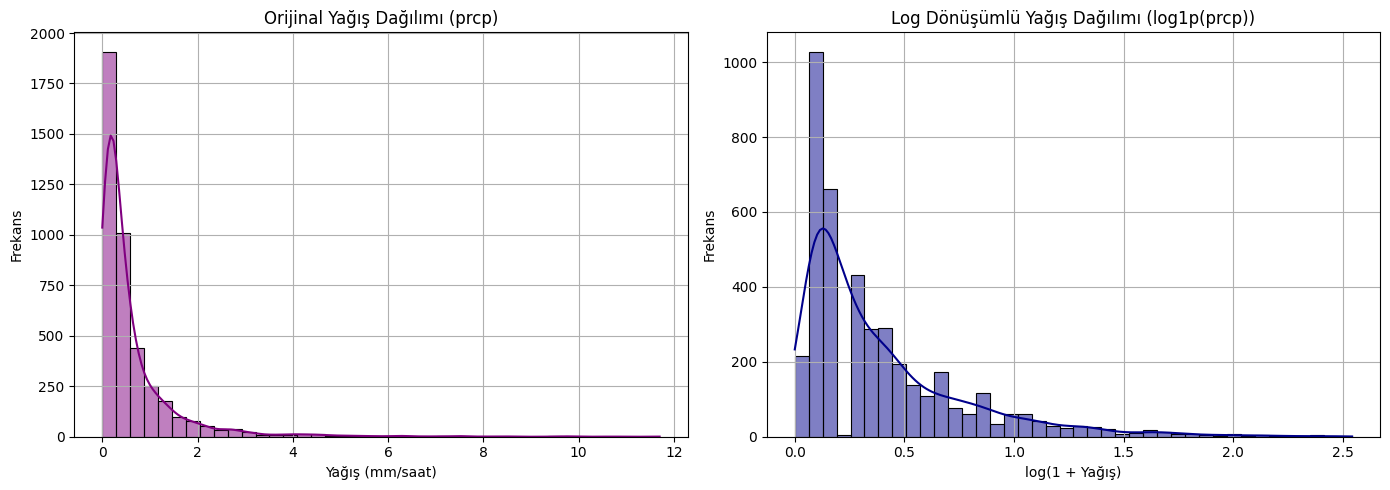

In [92]:
# Sıfır dışı prcp verisini filtrele ve log dönüşümünü uygula
df_prcp_raw = df[df['prcp'] > 0].copy()
df_prcp_raw['prcp_log'] = np.log1p(df_prcp_raw['prcp'])

# Histogramları çiz
plt.figure(figsize=(14, 5))

# 1. Orijinal prcp histogramı
plt.subplot(1, 2, 1)
sns.histplot(df_prcp_raw["prcp"], bins=40, kde=True, color='purple')
plt.title("Orijinal Yağış Dağılımı (prcp)")
plt.xlabel("Yağış (mm/saat)")
plt.ylabel("Frekans")
plt.grid(True)

# 2. Log dönüşümlü prcp histogramı
plt.subplot(1, 2, 2)
sns.histplot(df_prcp_raw["prcp_log"], bins=40, kde=True, color='darkblue')
plt.title("Log Dönüşümlü Yağış Dağılımı (log1p(prcp))")
plt.xlabel("log(1 + Yağış)")
plt.ylabel("Frekans")
plt.grid(True)

plt.tight_layout()
plt.show()

| Kriter          | Orijinal `prcp` | `log1p(prcp)` Dönüşümü                          |
| --------------- | --------------- | ----------------------------------------------- |
| Aykırı Etki     | Çok yüksek      | Azalmış                                         |
| Simetriklik     | Bozuk           | Artmış                                          |
| Model Uygunluğu | Düşük           | Yüksek                                          |
| Yorumu          | mm/saat         | log dönüşümlü birim – yorumu dikkatli yapılmalı |


✅ Tavsiye:
Modelleme aşamasında log1p(prcp) kullanın.

Tahmin sonrası yeniden ölçeklendirme için np.expm1() kullanarak orijinal değeri geri alabilirsiniz.

Görselleştirme ve raporlama aşamalarında ise orijinal prcp değerini kullanmaya devam edin.

İstersen bu dönüşümlü veri ile modellemeye geçebilir veya diğer meteorolojik/kirletici değişkenlerde benzer dönüşümleri uygulayabiliriz. Hangisini istersin?










## Veri Görselleştirme

## Hisogtram

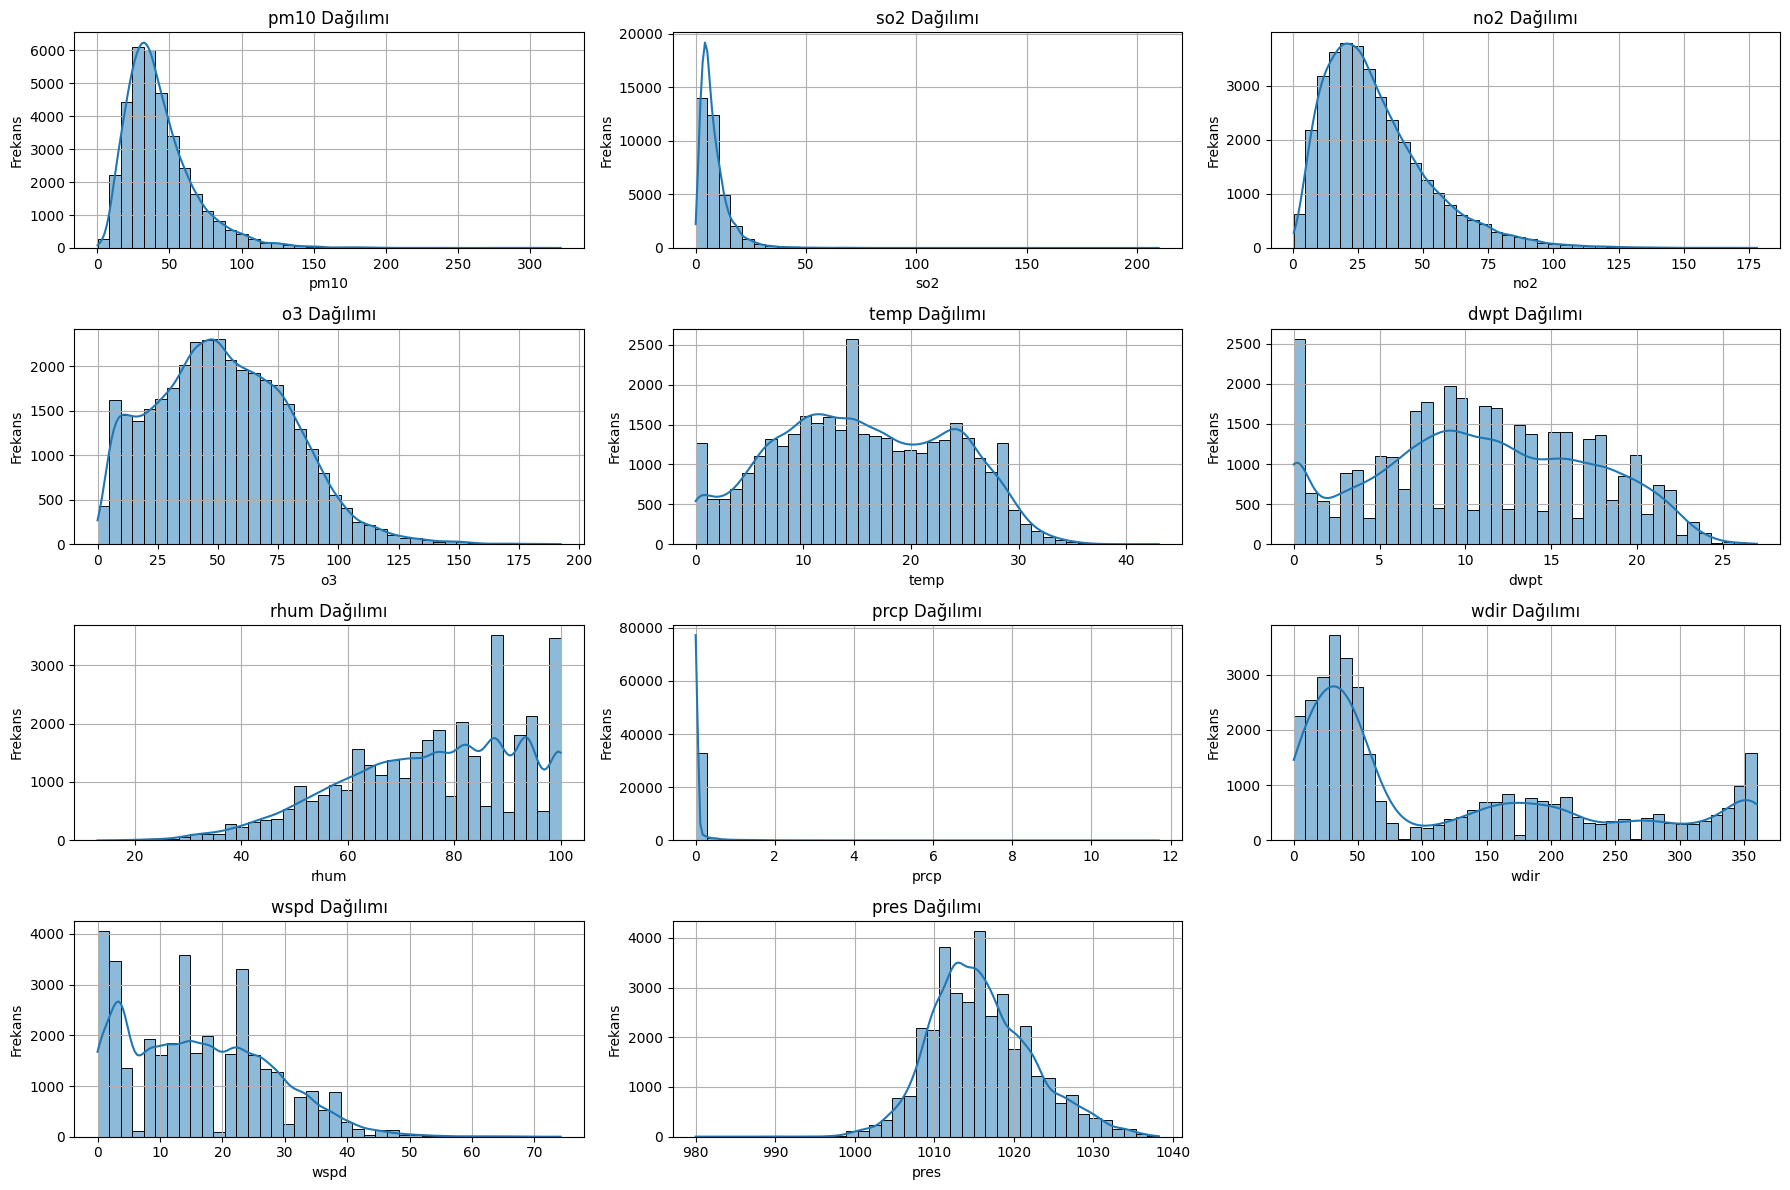

In [ ]:
# Tüm sayısal değişkenler için histogramları çizelim
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# Grafikleri 4x3 ızgara halinde çiz
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.grid(True)

plt.tight_layout()
plt.show()

| Değişken | Gözlem                     | Yorumu                                                                            |
| -------- | -------------------------- | --------------------------------------------------------------------------------- |
| **pm10** | Sağa çarpık                | Yoğunluk düşük seviyelerde, bazı ekstrem değerler mevcut → log dönüşümü önerilir. |
| **so2**  | Çok sağa çarpık            | Anlık pik salınımlar söz konusu → endüstriyel veya şehir içi emisyonlar.          |
| **no2**  | Sağlıklı çarpıklık         | Trafiğe bağlı yükselmeler var, çoğu değer düşük.                                  |
| **o3**   | İki tepe noktası (bimodal) | Gündüz ve gece oluşumu farklı → fotokimyasal reaksiyon etkisi.                    |


### Açıklama

🟦 Kirletici Değişkenler

| Değişken | Dağılım Özelliği     | Gözlem                                                                   |
| -------- | -------------------- | ------------------------------------------------------------------------ |
| **pm10** | Şiddetli sağa çarpık | Düşük değerlerde yığılma, 300+ aykırı değerler mevcut.                   |
| **so2**  | Aşırı sağa çarpık    | 0–10 µg/m³ aralığında sıkışma, nadir ama çok yüksek değerler var.        |
| **no2**  | Sağa çarpık          | 20–40 arası yoğunluk, 100+ değerler aykırı olabilir.                     |
| **o3**   | Asimetrik çift modlu | Ozonun hem düşük hem yüksek periyotları var → fotokimyasal süreç etkisi. |

🟩 Meteorolojik Değişkenler

| Değişken               | Dağılım Özelliği           | Gözlem                                                                                    |
| ---------------------- | -------------------------- | ----------------------------------------------------------------------------------------- |
| **temp** (sıcaklık)    | Simetriye yakın, çok modlu | Mevsimsel değişim açık; düşük sıcaklıklar kışa, yüksekler yaza işaret ediyor.             |
| **dwpt** (çiy noktası) | Hafif sağa çarpık          | Nemin doygunluk noktaları mevsime göre değişiyor.                                         |
| **rhum** (bağıl nem)   | Ters çarpık (sola)         | Değerler 70–100 arası yoğunlaşmış. Doğrusal olmayan ilişki kurmak gerekebilir.            |
| **prcp** (yağış)       | Aşırı sağa çarpık          | 0 değeri baskın, pozitif değerler nadir ama yüksek (bu zaten incelenmişti).               |
| **wdir** (rüzgar yönü) | Dairesel yapı – iki tepe   | 0–50 ve 300–360 derece arası baskın yönler var (muhtemelen kuzey-kuzeydoğu ve kuzeybatı). |
| **wspd** (rüzgar hızı) | Sağa çarpık                | 0–20 km/s arası yoğunluk, fırtına etkisiyle 60+ uç değerler mevcut.                       |
| **pres** (basınç)      | Normale yakın, çan eğrisi  | Sağlam sensör ölçümü, regresyon için uygundur.                                            |


## Dönüşümler (veri setini modellemeye hazırlamak için)

In [94]:
# Gerekli dönüşümleri uygulayarak modellemeye hazır veri seti oluşturalım

# 1. Log dönüşümü uygulanacak değişkenler
log_cols = ['prcp', 'pm10', 'so2', 'no2']
for col in log_cols:
    df[f'{col}_log'] = np.log1p(df[col])

# 2. Rüzgar yönü için sin-cos dönüşümü (çembersel)
df['wdir_rad'] = np.deg2rad(df['wdir'])
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# 3. Kullanılmayacak veya dönüşüm sonrası gerek kalmayan sütunları çıkar
drop_cols = ['prcp', 'pm10', 'so2', 'no2', 'wdir', 'wdir_rad']
df_model = df.drop(columns=drop_cols)

# 4. Yeni sütun sıralamasını düzenle (isteğe bağlı)
ordered_cols = ['datetime', 'o3', 'temp', 'dwpt', 'rhum', 'wspd', 'pres',
                'prcp_log', 'pm10_log', 'so2_log', 'no2_log',
                'wdir_sin', 'wdir_cos']

# Eğer tarih bilgisi kullanılmayacaksa datetime dışlanabilir
df_model = df_model[[col for col in ordered_cols if col in df_model.columns]]

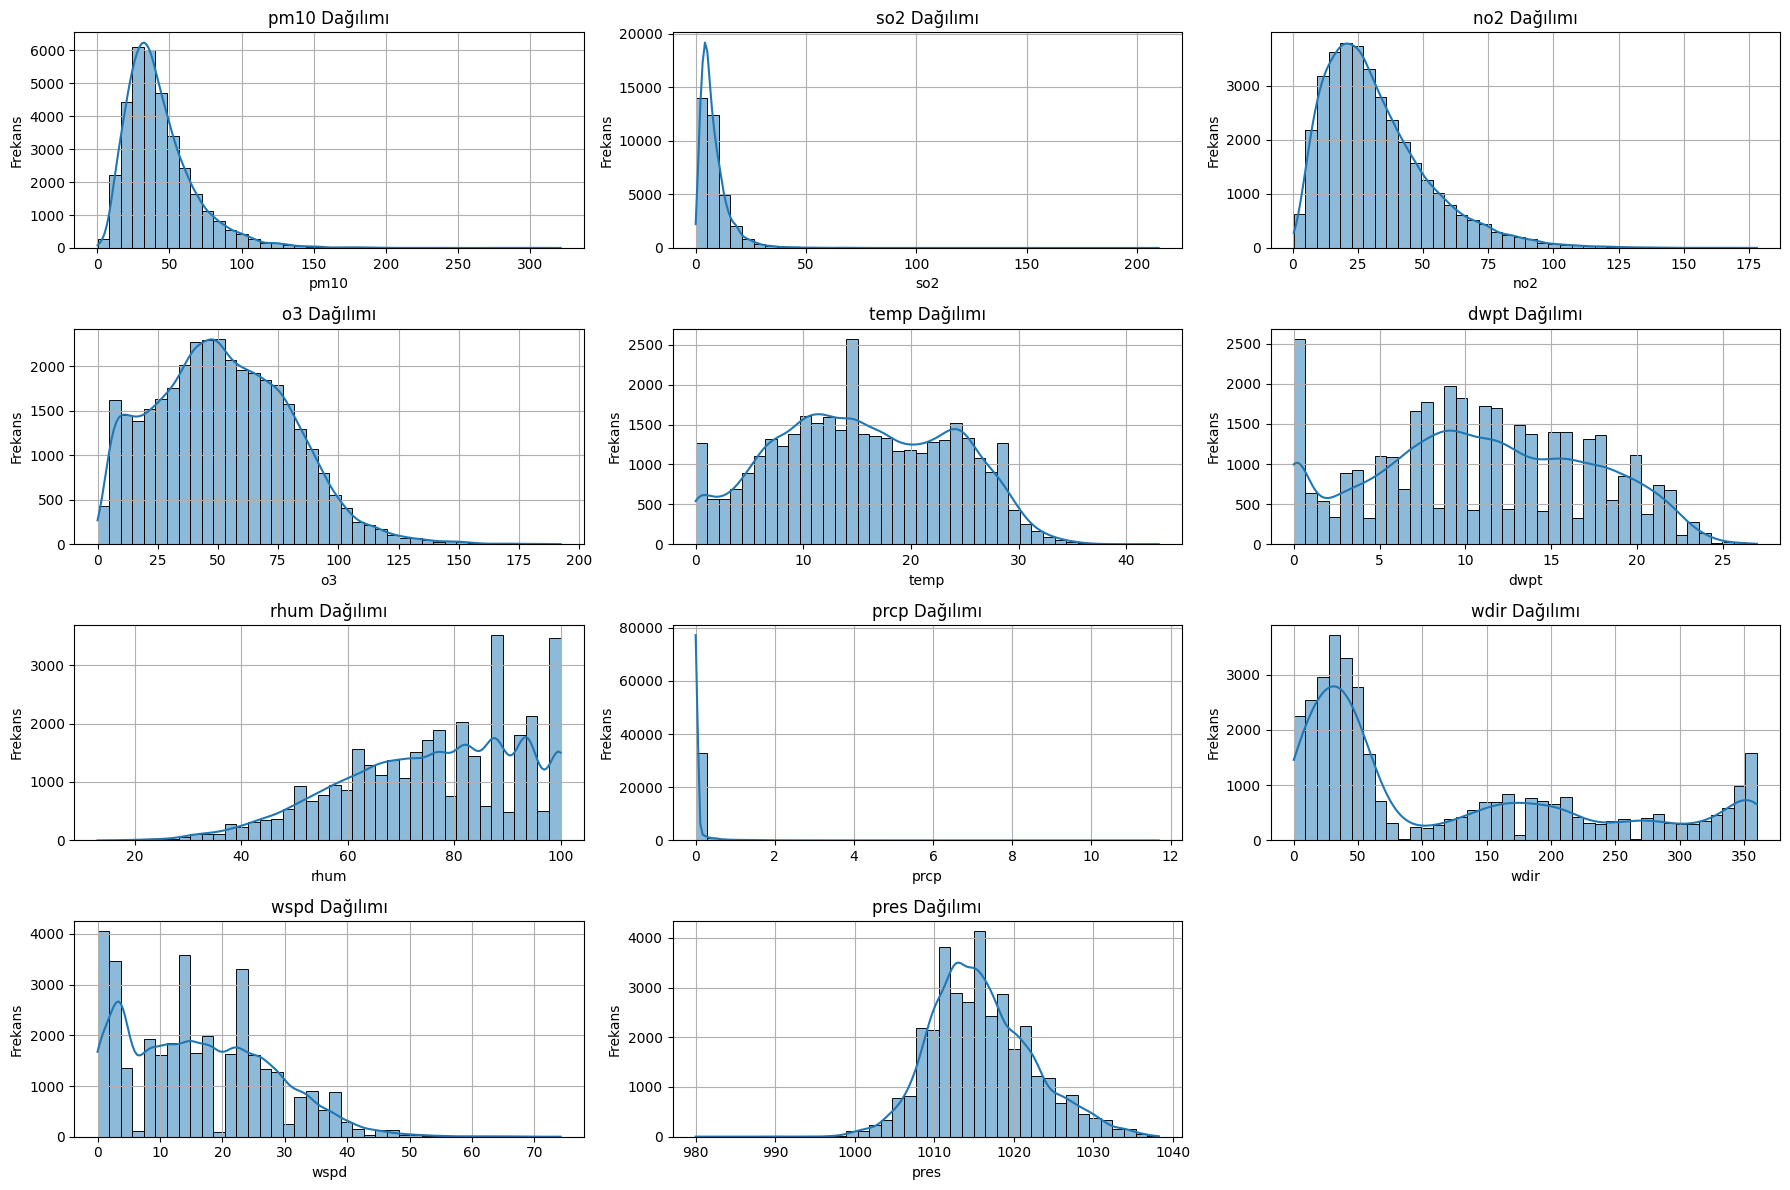

In [95]:
# Tüm sayısal değişkenler için histogramları çizelim
numeric_cols = ['pm10', 'so2', 'no2', 'o3', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']

# Grafikleri 4x3 ızgara halinde çiz
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.grid(True)

plt.tight_layout()
plt.show()

🎯 Kazanımlar:

| Özellik                            | Etki                                                      |
| ---------------------------------- | --------------------------------------------------------- |
| **Aykırı değer baskısı azalmış**   | Uç değerler sıkıştırılmış                                 |
| **Model stabilitesi artmış**       | Regresyon, karar ağacı gibi yöntemlerde hata payı düşer   |
| **Daha düzgün dağılımlar**         | Korelasyon, varyans analizi gibi tekniklere daha uygundur |
| **`wdir` çembersel yapı korunmuş** | Açısal dönüşüm sayesinde yön bilgisi kaybolmamış olur     |


## Korelasyon Analizi

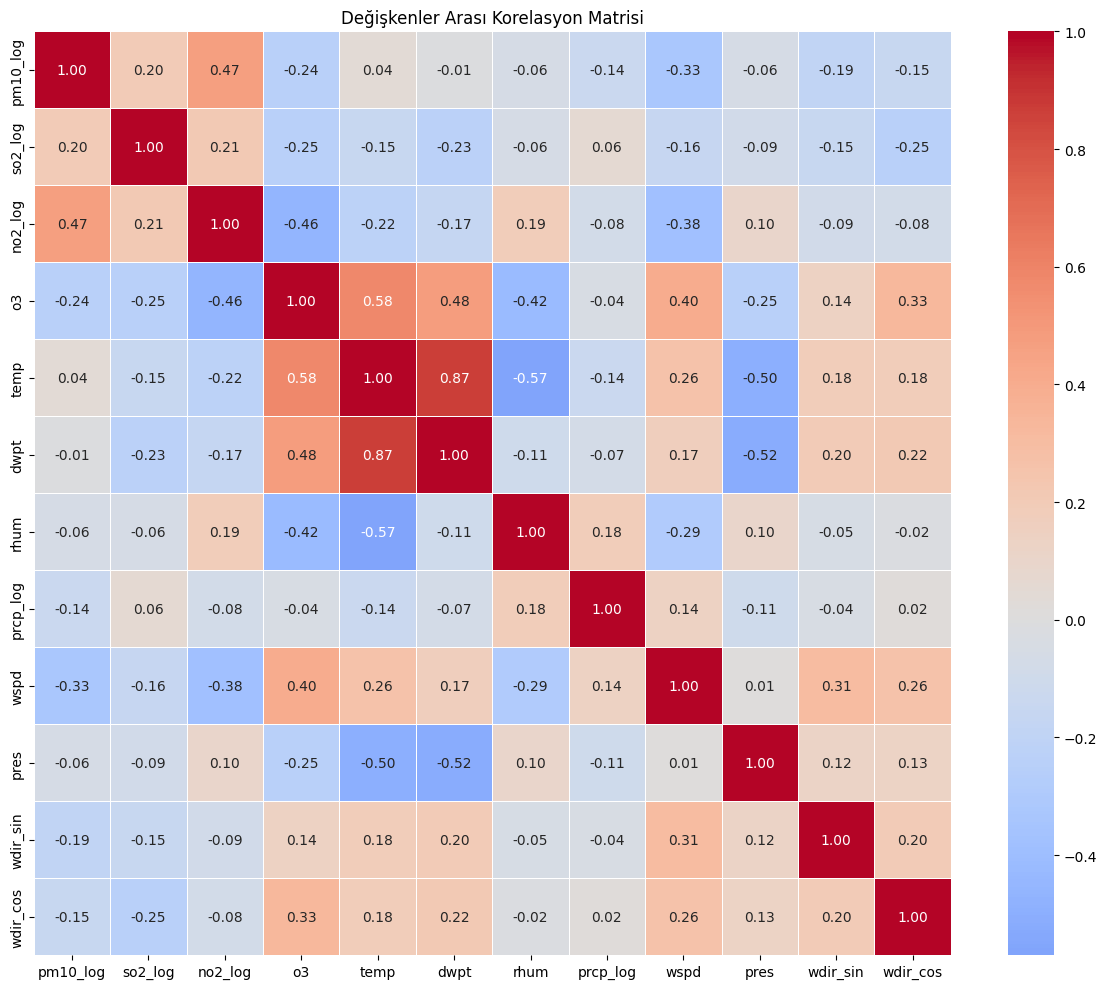

In [96]:
# log dönüşümü gereken değişkenler
for col in ['pm10', 'so2', 'no2', 'prcp']:
    df[f'{col}_log'] = np.log1p(df[col])

# wdir için sin/cos dönüşümü
df['wdir_rad'] = np.deg2rad(df['wdir'])
df['wdir_sin'] = np.sin(df['wdir_rad'])
df['wdir_cos'] = np.cos(df['wdir_rad'])

# Korelasyon analizi için seçilecek sütunlar
corr_cols = ['pm10_log', 'so2_log', 'no2_log', 'o3', 'temp', 'dwpt', 'rhum',
             'prcp_log', 'wspd', 'pres', 'wdir_sin', 'wdir_cos']

# Korelasyon matrisi
corr_df = df[corr_cols].corr(method='pearson').round(2)

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title("Değişkenler Arası Korelasyon Matrisi")
plt.tight_layout()
plt.show()


| Korelasyon Katsayısı | İlişki Gücü | Yorum                         |
| -------------------- | ----------- | ----------------------------- |
| 0.00–±0.10           | Çok zayıf   | Anlamlı değil                 |
| ±0.10–±0.39          | Zayıf       | **−0.33 → bu gruba girer**    |
| ±0.40–±0.69          | Orta düzey  | Dikkate alınmalı              |
| ±0.70–±0.89          | Güçlü       | Tahmin edici olabilir         |
| ±0.90–1.00           | Çok güçlü   | Nadiren görülür (nadir/ideal) |


| Değişkenler     | Korelasyon | Açıklama                                                            |
| --------------- | ---------- | ------------------------------------------------------------------- |
| `temp` ↔ `dwpt` | **0.87**   | Sıcaklık ve çiy noktası arasında doğal, fiziksel bağlılık.          |
| `o3` ↔ `temp`   | **0.58**   | Yüksek sıcaklık, ozon oluşumunu artırıyor (fotokimyasal reaksiyon). |
| `o3` ↔ `dwpt`   | **0.48**   | Nemli ve sıcak koşullar ozon seviyesini etkiliyor olabilir.         |


| Değişkenler        | Korelasyon | Açıklama                                                   |
| ------------------ | ---------- | ---------------------------------------------------------- |
| `temp` ↔ `rhum`    | **−0.57**  | Sıcaklık arttıkça bağıl nem düşer → doğal fiziksel ilişki. |
| `dwpt` ↔ `rhum`    | **−0.52**  | Sıcak havalarda göreceli nem azalma eğilimindedir.         |
| `wspd` ↔ `no2_log` | **−0.38**  | Rüzgar hızı arttıkça azot dioksit dispers olur, birikmez.  |


| Kirletici     | Etkileyen Değişkenler (en yüksek korelasyonlar) | Yorum                                                                             |
| ------------- | ----------------------------------------------- | --------------------------------------------------------------------------------- |
| **pm10\_log** | `no2_log` (0.47), `so2_log` (0.20)              | Kirleticiler birlikte artma eğiliminde; ortak kaynak (trafik/ısıtma) olabilir.    |
| **no2\_log**  | `pm10_log` (0.47), `wspd` (−0.38), `o3` (−0.46) | Azot dioksit rüzgarda seyrelir; ozonla ters yönlüdür.                             |
| **o3**        | `temp` (0.58), `dwpt` (0.48), `no2_log` (−0.46) | Güneşli, sıcak günlerde artar; azot oksitlerle kimyasal bağ var.                  |
| **prcp\_log** | Düşük korelasyon                                | Yağış, diğer parametrelerle doğrudan ilişkili değil; etkisi bağımsız incelenmeli. |


## Çok Değişkenli Analiz

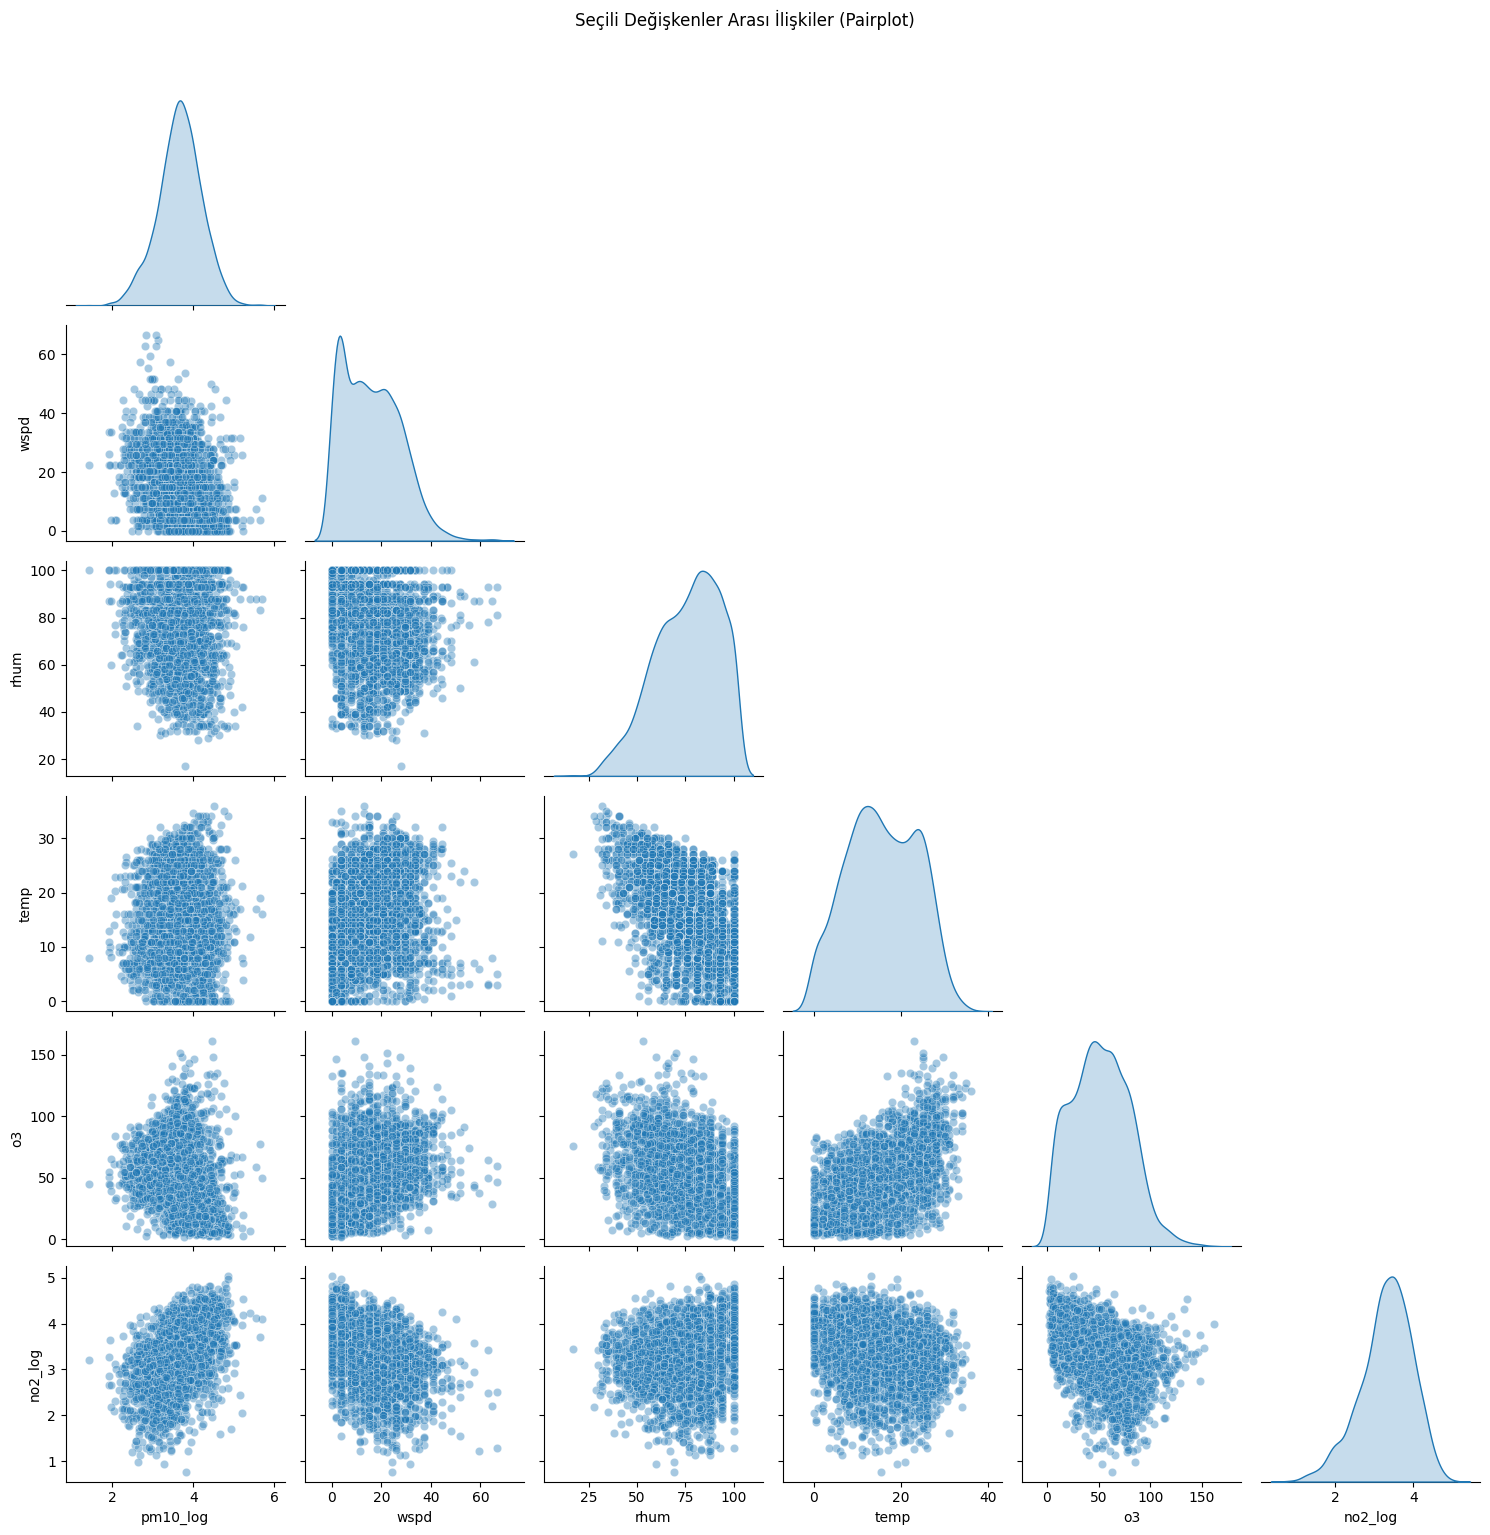

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gereken sütunlardan örnek veri alalım
sample_df = df[['pm10_log', 'wspd', 'rhum', 'temp', 'o3', 'no2_log']].sample(3000, random_state=42)

# Pairplot çizimi
sns.pairplot(sample_df, diag_kind='kde', corner=True, plot_kws={'alpha': 0.4})
plt.suptitle("Seçili Değişkenler Arası İlişkiler (Pairplot)", y=1.02)
plt.tight_layout()
plt.show()


📈 Çift Değişkenli İlişkiler (Scatter Plotlar)

| İlişki                 | Gözlem                       | Yorum                                                        |
| ---------------------- | ---------------------------- | ------------------------------------------------------------ |
| `pm10_log` ↔ `wspd`    | Hafif negatif eğilimli bulut | Rüzgar hızı arttıkça PM10 düşebilir (hava temizliği etkisi). |
| `pm10_log` ↔ `no2_log` | Pozitif, doğrusal ilişki     | Bu iki kirletici ortak kaynaklı olabilir (trafik vb.).       |
| `o3` ↔ `temp`          | Güçlü pozitif eğilim         | Yüksek sıcaklık ozon seviyesini artırıyor.                   |
| `rhum` ↔ `temp`        | Belirgin negatif ilişki      | Sıcaklık arttıkça bağıl nem düşme eğiliminde.                |
| `o3` ↔ `no2_log`       | Hafif negatif ilişki         | Kimyasal dönüşüm sonucu ozon ↔ NO₂ ters yönde etkilenebilir. |


Tekil Değişken Dağılımları (KDE - diyagonal çizgiler)

| Değişken   | Dağılım Tipi          | Yorum                                  |
| ---------- | --------------------- | -------------------------------------- |
| `pm10_log` | Hafif çarpık          | Log dönüşüm dengeli hale getirmiş.     |
| `wspd`     | Hafif sağa çarpık     | Düşük rüzgarlar sık, yüksekler nadir.  |
| `rhum`     | Ters çarpık           | Nem genellikle yüksek.                 |
| `temp`     | İki modlu (çift tepe) | Mevsimsel ayrım (yaz–kış) belirgin.    |
| `o3`       | Geniş ve değişken     | Mevsimsel ve saatlik etkiler olabilir. |
| `no2_log`  | Dengeli dağılım       | Log dönüşüm etkili.                    |



🧠 Çıkarımlar & Tavsiyeler
✅ temp, wspd, rhum gibi meteorolojik değişkenlerin PM10 ve O₃ üzerinde etkili olduğu açık.

🔁 pm10_log ↔ no2_log birlikte modele girerse multicollinearity kontrol edilmeli.

🌞 o3 değişkeni sıcaklıkla güçlü bağa sahip → yaz aylarında dikkatli yorumlanmalı.

📊 Gözlemler belirgin doğrusal desen göstermese de, ağaç tabanlı modeller (RandomForest, XGBoost) bu ilişkileri başarıyla öğrenebilir.

In [97]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Mounted at /content/drive


## Otomatik EDA Raporlama

🎯 EDA Raporu Ne Anlatır?
1. Veri Kümesi Genel Görünüm (Overview / Dataset statistics)
Gözlem ve sütun sayısı

Sayısal, kategorik ve zaman serisi değişken sayıları

Boş hücre sayısı ve oranı

Duplikasyon (tekrarlı satırlar)

📌 Yarar: Veri boyutunu ve temizlik ihtiyacını hızlıca görürsün.

2. Değişkenler (Variables)
Her bir değişken için:

Türü (sayısal, kategorik vs.)

Benzersiz değer sayısı

Aykırı değer sayısı

Eksik değer oranı

Minimum, maksimum, ortalama, çeyrekler

📌 Yarar: Hangi değişkenin ne kadar bilgi taşıdığını, aykırı/eksik olup olmadığını kolayca gözlemlersin.

3. Eksik Veriler (Missing Values)
Hangi değişkende ne kadar eksik veri var?

Eksik verilerdeki desenler (örneğin bir grup değişkende hep birlikte eksik olma)

📌 Yarar: Eksik veri stratejisi geliştirmeni sağlar (örneğin silme, ortalama ile doldurma, modelleme).

4. Dağılımlar (Distributions)
Her değişken için histogram, boxplot, kernel density (yoğunluk) grafikleri

Aykırı değerler görsel olarak tespit edilir.

📌 Yarar: Normal dağılıma uygunluk, dönüşüm ihtiyacı (log, sqrt gibi) analiz edilir.

5. Korelasyon Matrisi (Correlations)
Sayısal değişkenler arasındaki ilişki

Spearman, Pearson veya Kendall korelasyon katsayılarıyla

📌 Yarar: Hedef değişken ile ilişkili bağımsız değişkenleri tespit etmek ve çoklu bağlantıları görmek.

6. Etkileşimler (Interactions)
İki değişkenin birlikte dağılımları (jointplot, pairplot)

📌 Yarar: Değişken çiftleri arasındaki doğrusal veya doğrusal olmayan ilişkiyi keşfetmek.

7. Zaman Serisi Görselleştirmeleri (Varsa datetime)
Trend, mevsimsellik ve değişkenlerin zamana göre değişimi

📌 Yarar: Özellikle hava kalitesi gibi zamanla değişen verilerde mevsimsel veya trend etkilerini analiz etmek.

🛠️ EDA Raporunu Nasıl Kullanmalısın?
Amaç	Kullanım Önerisi
Veri Temizleme	Eksik, aykırı veya anlamlı olmayan verileri tespit et ve düzelt.
Modelleme Öncesi	Hangi değişkenleri modele alacağını, hangilerini dışarda bırakacağını belirle.
Özellik Mühendisliği	Gerekirse dönüşüm (ör. log), etkileşim ya da kategori birleştirme uygula.
Model Sonrası Yorumlama	Modelin öngörülerini daha iyi yorumlamak için veri yapısını iyi tanı.

📌 Akademik Not
EDA, veriye dayalı karar verme sürecinin ilk ve vazgeçilmez adımıdır (Tukey, 1977). EDA yapılmadan doğrudan modelleme yapmak; bir harita olmadan ormanda yön bulmaya çalışmak gibidir. Modern veri bilimi yaklaşımlarında, EDA süreci görselleştirme ile birlikte düşünülür.

İstersen şu anda birlikte bir EDA raporu oluşturup, çıktıları üzerinden analiz yapabiliriz. Elinde çalışmakta olduğun veri setiyle başlayalım mı?










In [ ]:
!pip install ydata-profiling

import pandas as pd
from ydata_profiling import ProfileReport

# Profil raporu oluştur
profile = ProfileReport(df, title="Bandırma Hava Kalitesi Veri Seti - Otomatik EDA Raporu", explorative=True)

# Raporu HTML olarak kaydet
report_path = "/content/drive/MyDrive/hava_kalitesi/eda_raporu.html"
profile.to_file(report_path)

report_path


Pandas-profiling kullan1kullanılarak otomatik EDA raporlar1 oluşturulur.
Verinin genel durumu hakk1nda h1zl1ca bilgi edinilir

# Feature Engineering

Feature engineering için
AI önerileri alınır. Modelin
performansını arttırmak
için yeni özellikler
oluşturulur

HAVA KALİTESİ İNDEKSİ

Hava Kalitesi indeksi (HKİ), hava kalitesinin günlük olarak rapor edilmesi için kullanılan bir indekstir. Yaşadığımız bölgenin havasının ne kadar temiz veya kirli olduğu ve ne tür sağlık etkilerinin oluşabileceği konusunda bilgiler verir.

Hava kalitesi indeksi, farklı hava kalitesi seviyeleri ile birlikte bunların genel halk sağlığı üzerindeki etkisini ve sağlıksız seviyeye yükseldiğinde alınması gereken kademeleri de belirler. Ulusal Hava Kalitesi İndeksi, EPA Hava Kalitesi İndeksini ulusal mevzuatımız ve sınır değerlerimize uyarlayarak oluşturulmuştur. 5 temel kirletici için hava kalitesi indeksi hesaplanmaktadır.

Bunlar; partikül maddeler (PM10), karbonmonoksit (CO), kükürtdioksit (SO2), azotdioksit (NO2) ve ozon (O3) dur. Hava kalitesi indeksi 6 kategoriden oluşmaktadır. Matematiksel hesaplama yoktur, yalnızca sınıflandırmadır. En yüksek kirletici için belirlenen değer indeks değeridir.

kaynak:
https://dathm.csb.gov.tr/hava-kalitesi-indeksi-i-89066

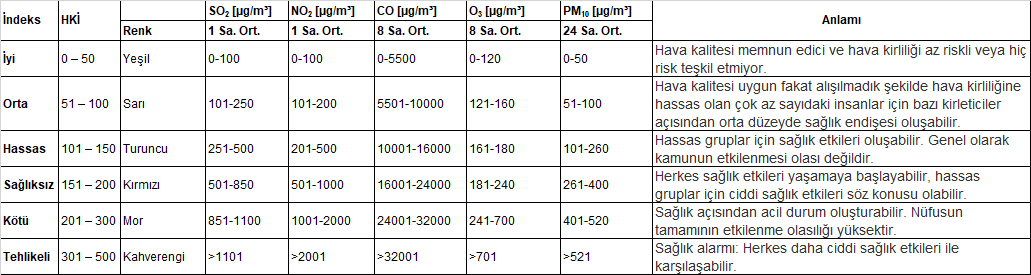

In [109]:
# EPA HKİ hesaplama fonksiyonu
def calculate_hki(C, bp_lo, bp_hi, i_lo, i_hi):
    return ((i_hi - i_lo) / (bp_hi - bp_lo)) * (C - bp_lo) + i_lo

# HKİ eşiklerini her kirletici için tanımlayalım
hki_breakpoints = {
    'pm10': [(0, 50, 0, 50), (51, 100, 51, 100), (101, 260, 101, 150),
             (261, 400, 151, 200), (401, 520, 201, 300), (521, 1000, 301, 500)],
    'so2': [(0, 100, 0, 50), (101, 250, 51, 100), (251, 500, 101, 150),
            (501, 850, 151, 200), (851, 1100, 201, 300), (1101, 3000, 301, 500)],
    'no2': [(0, 100, 0, 50), (101, 200, 51, 100), (201, 500, 101, 150),
            (501, 1000, 151, 200), (1001, 2000, 201, 300), (2001, 4000, 301, 500)],
    'o3': [(0, 120, 0, 50), (121, 160, 51, 100), (161, 180, 101, 150),
           (181, 240, 151, 200), (241, 700, 201, 300), (701, 2000, 301, 500)],
}

# İlk 5000 satır üzerinden HKİ hesaplama
df_sample = df.head(5000).copy()

# Her kirletici için HKİ sütunlarını oluştur
for pollutant, ranges in hki_breakpoints.items():
    hki_values = []
    for value in df_sample[pollutant]:
        hki = None
        for bp_lo, bp_hi, i_lo, i_hi in ranges:
            if bp_lo <= value <= bp_hi:
                hki = calculate_hki(value, bp_lo, bp_hi, i_lo, i_hi)
                break
        hki_values.append(hki if hki is not None else 0)
    df_sample[f'hki_{pollutant}'] = hki_values

# Genel HKİ: her satırda en yüksek olan değer
df_sample['hki_genel'] = df_sample[[f'hki_{p}' for p in hki_breakpoints]].max(axis=1)

# Sonuçların ilk satırlarını göster
df_sample[[f'hki_{p}' for p in hki_breakpoints] + ['hki_genel']].head()


,hki_pm10,hki_so2,hki_no2,hki_o3,hki_genel
datetime,,,,,
2021-01-01 00:00:00,20.08,3.470,5.110,23.150000,23.150000
2021-01-01 01:00:00,18.07,4.110,6.320,21.641667,21.641667
2021-01-01 02:00:00,26.32,2.815,3.990,27.658333,27.658333
2021-01-01 03:00:00,25.14,1.240,2.325,28.791667,28.791667
2021-01-01 04:00:00,24.23,1.040,1.745,28.083333,28.083333


In [111]:
# HKİ kategorileri, renkleri ve açıklamaları eşleştirme sözlüğü
hki_metadata = {
    "İyi": {
        "renk": "Yeşil",
        "aciklama": "Hava kalitesi sağlık açısından tatmin edici, kirleticilerin etkisi çok azdır veya yoktur."
    },
    "Orta": {
        "renk": "Sarı",
        "aciklama": "Hava kalitesi kabul edilebilir; ancak bazı kirleticiler hassas bireylerde orta düzey sağlık etkileri yaratabilir."
    },
    "Hassas": {
        "renk": "Turuncu",
        "aciklama": "Hassas gruplar (çocuklar, yaşlılar, solunum hastaları) için sağlıksız olabilir. Genel halk için kabul edilebilir."
    },
    "Sağlıksız": {
        "renk": "Kırmızı",
        "aciklama": "Herkes sağlık etkileri hissedebilir. Hassas gruplar için daha ciddi etkiler söz konusu olabilir."
    },
    "Kötü": {
        "renk": "Mor",
        "aciklama": "Ciddi sağlık etkileri olabilir. Herkes etkilenebilir. Özellikle hassas bireyler için tehlikelidir."
    },
    "Tehlikeli": {
        "renk": "Kahverengi",
        "aciklama": "Acil durum: Ciddi sağlık etkileri, toplumun tamamı için risk söz konusudur."
    }
}

# HKİ etiketleme fonksiyonu
def label_hki(val):
    if val <= 50:
        return 'İyi'
    elif val <= 100:
        return 'Orta'
    elif val <= 150:
        return 'Hassas'
    elif val <= 200:
        return 'Sağlıksız'
    elif val <= 300:
        return 'Kötü'
    else:
        return 'Tehlikeli'

# Kategori, renk ve açıklamayı dataframe'e ekleyelim
df['hki_kategori'] = df['hki_genel'].apply(label_hki)
df['hki_renk'] = df['hki_kategori'].map(lambda x: hki_metadata[x]['renk'])
df['hki_aciklama'] = df['hki_kategori'].map(lambda x: hki_metadata[x]['aciklama'])

# Örnek çıktı
df[['hki_genel', 'hki_kategori', 'hki_renk', 'hki_aciklama']].head()


,hki_genel,hki_kategori,hki_renk,hki_aciklama
datetime,,,,
2021-01-01 00:00:00,23.150000,İyi,Yeşil,"Hava kalitesi sağlık açısından tatmin edici, k..."
2021-01-01 01:00:00,21.641667,İyi,Yeşil,"Hava kalitesi sağlık açısından tatmin edici, k..."
2021-01-01 02:00:00,27.658333,İyi,Yeşil,"Hava kalitesi sağlık açısından tatmin edici, k..."
2021-01-01 03:00:00,28.791667,İyi,Yeşil,"Hava kalitesi sağlık açısından tatmin edici, k..."
2021-01-01 04:00:00,28.083333,İyi,Yeşil,"Hava kalitesi sağlık açısından tatmin edici, k..."


Genel HKİ'yi Belirleyen Kirletici Değişkenler

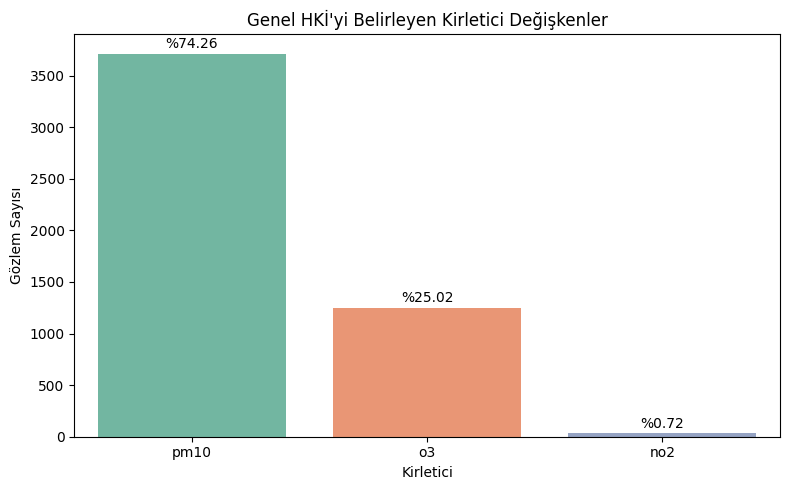

,Kirletici,Sayı,Yüzde (%)
0,pm10,3713,74.26
1,o3,1251,25.02
2,no2,36,0.72


In [112]:
# Belirleyici kirletici sütunu tanımlı değilse tekrar oluşturalım
hki_columns = [f'hki_{p}' for p in ['pm10', 'so2', 'no2', 'o3']]
df_sample['hki_kaynak'] = df_sample[hki_columns].idxmax(axis=1).str.replace('hki_', '')

# Sayı ve yüzde hesapla
total_rows = len(df_sample)
hki_kaynak_yuzde = df_sample['hki_kaynak'].value_counts().reset_index()
hki_kaynak_yuzde.columns = ['Kirletici', 'Sayı']
hki_kaynak_yuzde['Yüzde (%)'] = (hki_kaynak_yuzde['Sayı'] / total_rows * 100).round(2)

# Görselleştirme - Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=hki_kaynak_yuzde, x='Kirletici', y='Sayı', palette='Set2')

# Değerleri çubuk üzerine yazalım
for index, row in hki_kaynak_yuzde.iterrows():
    plt.text(index, row.Sayı + 50, f"%{row['Yüzde (%)']}", ha='center', fontsize=10)

plt.title("Genel HKİ'yi Belirleyen Kirletici Değişkenler")
plt.ylabel("Gözlem Sayısı")
plt.xlabel("Kirletici")
plt.tight_layout()
plt.show()

# Tabloyu da tekrar göster
hki_kaynak_yuzde


Mevsimlere Göre Genel Hava Kalitesi İndeksini (HKİ) Belirleyen Kirleticiler

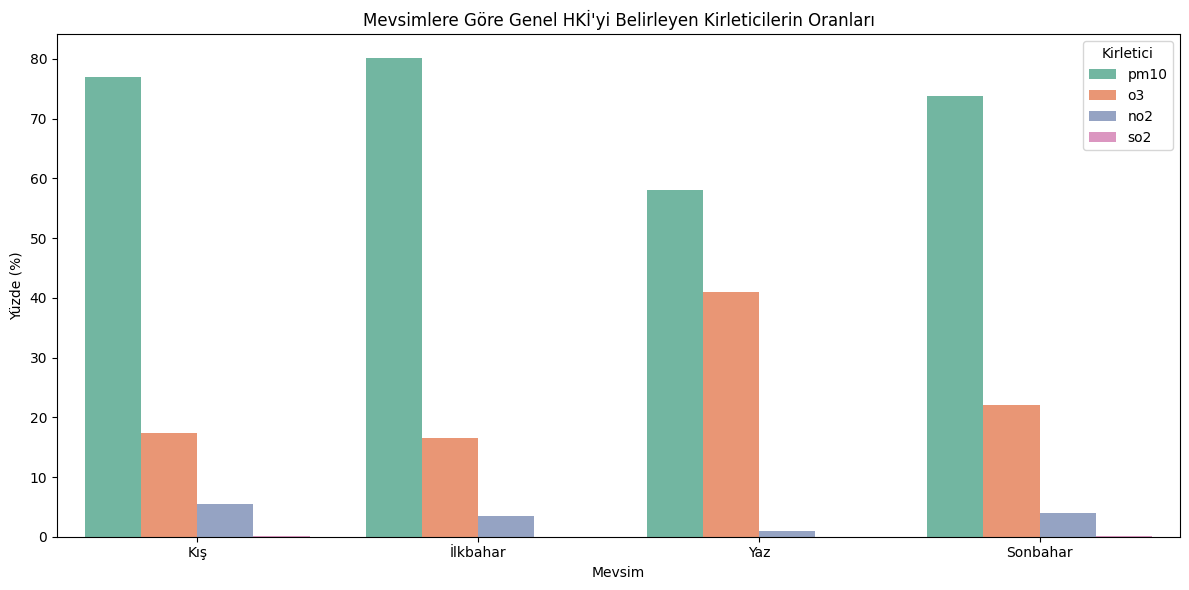

In [117]:
# Dört mevsim için verileri tek bir DataFrame'de birleştirip mevsim etiketlerini ekleyelim
sonbahar_kaynak_yuzde['Mevsim'] = 'Sonbahar'
ilkbahar_kaynak_yuzde['Mevsim'] = 'İlkbahar'
kis_kaynak_yuzde['Mevsim'] = 'Kış'
yaz_kaynak_yuzde['Mevsim'] = 'Yaz'

# Tümünü birleştir
mevsim_kaynak_df = pd.concat([
    sonbahar_kaynak_yuzde,
    ilkbahar_kaynak_yuzde,
    kis_kaynak_yuzde,
    yaz_kaynak_yuzde
], ignore_index=True)

# Mevsime göre sıralı gösterim için kategori tanımı
mevsim_sirasi = ['Kış', 'İlkbahar', 'Yaz', 'Sonbahar']
mevsim_kaynak_df['Mevsim'] = pd.Categorical(mevsim_kaynak_df['Mevsim'], categories=mevsim_sirasi, ordered=True)

# Görselleştirme
plt.figure(figsize=(12, 6))
sns.barplot(data=mevsim_kaynak_df, x='Mevsim', y='Yüzde (%)', hue='Kirletici', palette='Set2')
plt.title("Mevsimlere Göre Genel HKİ'yi Belirleyen Kirleticilerin Oranları")
plt.ylabel("Yüzde (%)")
plt.xlabel("Mevsim")
plt.legend(title="Kirletici")
plt.tight_layout()
plt.show()


PM10 (Partikül Madde) her mevsimde en baskın kirletici olup, HKİ'yi en fazla etkileyen değişkendir.

İlkbahar ve Kış aylarında %80’e yakın oranla en yüksek etkiye sahiptir.

Yaz mevsiminde etkisi azalsa da hâlâ en baskın kirletici konumundadır (%58).

O₃ (Ozon) özellikle Yaz aylarında %41 oranla HKİ’yi en çok etkileyen ikinci kirletici olmuştur.

Bu mevsimsel artış, ozonun güneş ışığı ve sıcaklıkla birlikte fotokimyasal reaksiyonlarla oluştuğunu gösterir.

NO₂ (Azot Dioksit) tüm mevsimlerde %1–6 arasında düşük oranlarla yer almakta; trafik kaynaklı etkilerinin HKİ’ye doğrudan baskın etki yapmadığı söylenebilir.

SO₂ (Kükürt Dioksit) her mevsimde %1’in altında kalmıştır. Isınma ve sanayi kaynaklı olsa da diğer kirleticilere göre daha az etkili.

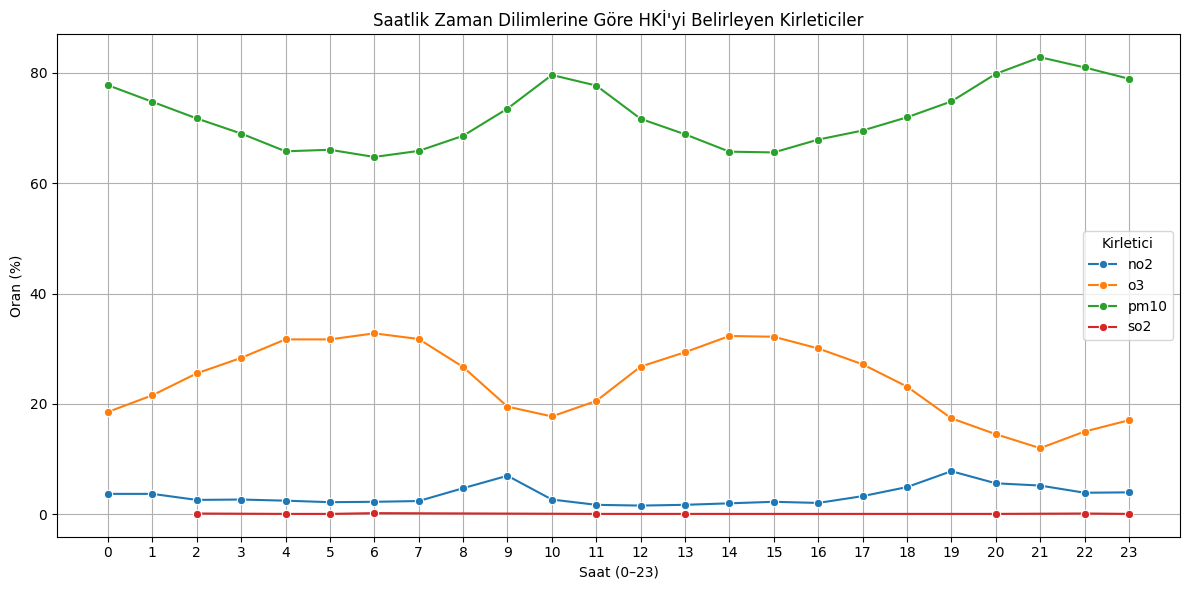

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Saat bilgisi datetime'ten alınacak şekilde kontrol edelim
if 'hour' not in df.columns:
    df['hour'] = df['datetime'].dt.hour

# Saatlik HKİ kaynak analizi
df['hki_kaynak'] = df[[f'hki_{p}' for p in ['pm10', 'so2', 'no2', 'o3']]].idxmax(axis=1).str.replace('hki_', '')

# Saatlik frekans tablosu
saatlik_kaynak_df = df.groupby(['hour', 'hki_kaynak']).size().reset_index(name='Sayı')
saatlik_kaynak_df['Yüzde (%)'] = saatlik_kaynak_df.groupby('hour')['Sayı'].transform(lambda x: 100 * x / x.sum())

# Görselleştirme: Saatlik dağılım (Stacked bar plot değil, ayrı çizgi olarak gösterim)
plt.figure(figsize=(12, 6))
sns.lineplot(data=saatlik_kaynak_df, x='hour', y='Yüzde (%)', hue='hki_kaynak', marker='o')
plt.title("Saatlik Zaman Dilimlerine Göre HKİ'yi Belirleyen Kirleticiler")
plt.xlabel("Saat (0–23)")
plt.ylabel("Oran (%)")
plt.xticks(range(0, 24))
plt.legend(title="Kirletici")
plt.grid(True)
plt.tight_layout()
plt.show()


Saatlik Zaman Dilimlerine Göre HKİ'yi Belirleyen Kirleticiler

– Yorum:

PM10 her saat diliminde baskın kirletici olup, tüm gün boyunca %70’in üzerinde bir oranla genel HKİ’yi belirlemiştir.

Özellikle 10:00 ve 23:00 saatleri arasında oranı %78–79 düzeyine ulaşmaktadır.

O₃ (ozon) öğle saatlerinde (12:00–17:00) etkisini artırmakta ve %25’e kadar çıkmaktadır.

Bu artış, ozonun fotokimyasal bir kirletici olmasından ve güneş ışığıyla oluşmasından kaynaklanmaktadır.

NO₂ oranı gece saatlerinde (%13–14) artış göstermekte, gündüz saatlerinde daha düşük düzeydedir. Bu durum trafik kaynaklı emisyonlar ile ilişkili olabilir.

SO₂ genel olarak tüm saatlerde etkisiz kalmış (%1’in altında).

Günün tamamında PM10, hava kalitesini en çok etkileyen kirletici olarak öne çıkıyor.

Ozon, özellikle yaz ve güneşli günlerin yoğun olduğu saatlerde daha baskın bir kirletici hâline geliyor.

Zaman bazlı önlemler alınması, özellikle ozon ve NO₂ gibi değişken kirleticiler için kritik olabilir.


<Figure size 1200x600 with 0 Axes>

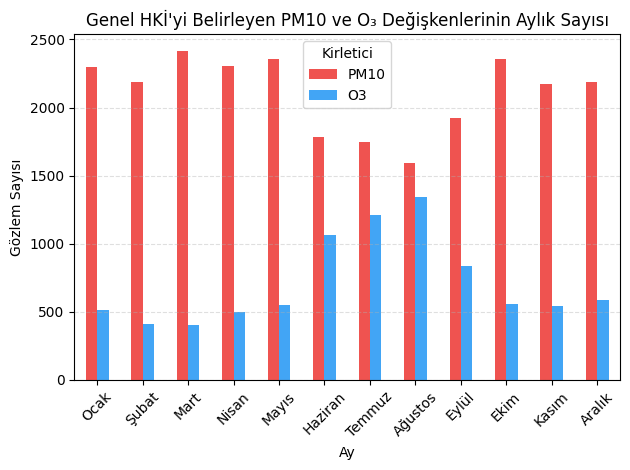

In [ ]:
# Add 'hki_kaynak' and 'ay_ad' columns to the main df DataFrame

# Belirleyici kirletici sütunu tanımlı değilse tekrar oluşturalım
hki_columns = [f'hki_{p}' for p in ['pm10', 'so2', 'no2', 'o3']]

# Calculate HKİ for the entire df DataFrame
for pollutant, ranges in hki_breakpoints.items():
    hki_values = []
    for value in df[pollutant]:
        hki = None
        for bp_lo, bp_hi, i_lo, i_hi in ranges:
            if bp_lo <= value <= bp_hi:
                hki = calculate_hki(value, bp_lo, bp_hi, i_lo, i_hi)
                break
        hki_values.append(hki if hki is not None else 0)
    df[f'hki_{pollutant}'] = hki_values

df['hki_kaynak'] = df[hki_columns].idxmax(axis=1).str.replace('hki_', '')

# Add 'ay_ad' column to the main df DataFrame
ay_sira = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran',
           'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
df['ay_ad'] = df['month'].apply(lambda x: ay_sira[x-1])


# PM10 ve O3 değişkenlerinin HKİ'yi belirlediği gözlemler için aylık toplam sayıları hesaplayalım
pm10_ay_sayim = df[df['hki_kaynak'] == 'pm10']['ay_ad'].value_counts().reindex(ay_sira, fill_value=0)
o3_ay_sayim = df[df['hki_kaynak'] == 'o3']['ay_ad'].value_counts().reindex(ay_sira, fill_value=0)

# Verileri birleştir
aylik_kaynak_df = pd.DataFrame({'PM10': pm10_ay_sayim, 'O3': o3_ay_sayim})
aylik_kaynak_df.index.name = 'Ay'

# Bar plot
plt.figure(figsize=(12, 6))
aylik_kaynak_df.plot(kind='bar', stacked=False, color=['#ef5350', '#42a5f5'])

plt.title("Genel HKİ'yi Belirleyen PM10 ve O₃ Değişkenlerinin Aylık Sayısı")
plt.xlabel("Ay")
plt.ylabel("Gözlem Sayısı")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Kirletici")
plt.tight_layout()
plt.show()

📊 Bar Grafiği – PM10 ve O₃ Kirleticilerinin HKİ’yi Belirlediği Saatlik Dağılım

🔍 Gözlemler:

🟥 PM10 (Partikül Madde 10 mikron):
En yoğun olarak 08:00–11:00 ve 19:00–22:00 saatleri arasında HKİ’yi belirliyor.

Bu saatler, trafik yoğunluğu, ısınma faaliyetleri ve hava sirkülasyonunun zayıf olduğu zaman dilimleriyle çakışır.

🔷 O₃ (Ozon):
En belirgin etki 13:00–17:00 saatleri arasında görülüyor.

Bu zaman dilimi, güneş ışınımının en güçlü olduğu saatlerdir ve fotokimyasal reaksiyonların artmasıyla ozon seviyeleri yükselir.

📌 Yorum:

PM10: Günün başında ve sonunda etkili → insan kaynaklı emisyonlarla (trafik, ısınma) ilişkili.

O₃: Öğle saatlerinde pik yapıyor → atmosferik fotokimyasal süreçler sonucu oluşur.

Bu analiz, saatlik bazda alınacak önlemler için çok değerli bir içgörü sağlar. İstersen bu desenleri hafta içi/hafta sonu gibi başka zaman bileşenleriyle de inceleyebiliriz. Devam edelim mi?

# Meteorolojik Değişkenlerin HKİ'ye Etkisi (Feature Importance)

Rastgele Orman Modeli (RandomForestRegressor)

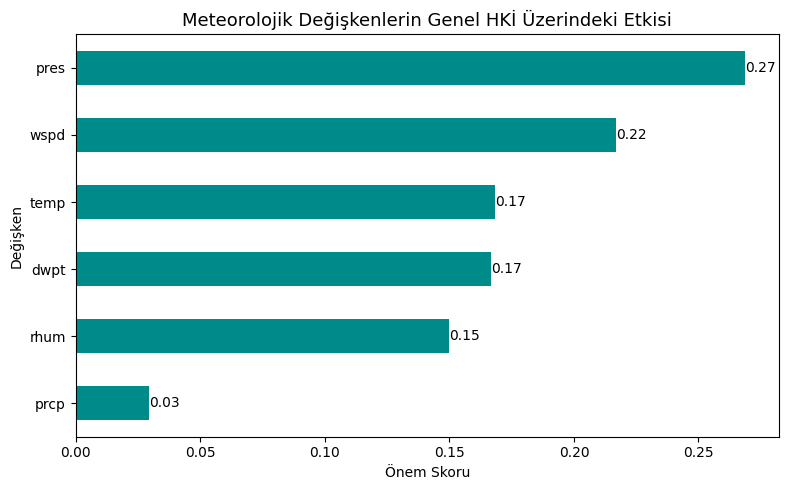

In [122]:
# Gerekli kütüphaneler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔸 Kullanılacak meteorolojik değişkenler
meteorolojik = ['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']

# ⛳️ Hedef değişken: Genel HKİ
y = df['hki_genel']

# 🔹 Girdi değişkenleri: Meteorolojik değişkenler
X = df[meteorolojik]

# 🔍 Eksik verileri düşürerek X ve y'yi eşitleyelim
# Sadece X'teki eksik değerleri temizleyip, y'yi de aynı satırlara göre filtreleyelim.
gecerli_indeksler = X.dropna().index
X = X.loc[gecerli_indeksler]
y = y.loc[gecerli_indeksler]


# 🎯 Eğitim ve test kümelerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 🌲 Rastgele Orman Modeli (RandomForestRegressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 🧠 Özellik önem düzeylerini hesapla
onemler = pd.Series(model.feature_importances_, index=X.columns).sort_values()

# 📊 Görselleştirme: Özellik önem sıralaması
plt.figure(figsize=(8, 5))
ax = onemler.plot(kind='barh', color='darkcyan') # ax objesini alalım

# Çubukların üzerine değerleri yazdıralım
for index, value in enumerate(onemler):
    ax.text(value, index, f'{value:.2f}', va='center') # Değeri çubuğun sonuna yazdır

plt.title("Meteorolojik Değişkenlerin Genel HKİ Üzerindeki Etkisi", fontsize=13)
plt.xlabel("Önem Skoru")
plt.ylabel("Değişken")
plt.tight_layout()
plt.show()

| Değişken                                 | Etki Düzeyi                        | Açıklama                                                                                                                                      |
| ---------------------------------------- | ---------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------- |
| **pres (Basınç)**                        | 🟢 En yüksek etkiye sahip (\~%26)  | Yüksek veya düşük basınç sistemleri hava kirliliği dağılımını etkiler. Özellikle durgun hava koşulları kirleticilerin birikmesine neden olur. |
| **wspd (Rüzgar Hızı)**                   | 🟠 İkinci sırada (\~%22)           | Rüzgar, hava kirleticileri dağıtarak yoğunluğu azaltabilir. Düşük rüzgar hızlarında HKİ değerleri yükselir.                                   |
| **dwpt & temp** (Çiy Noktası & Sıcaklık) | 🟡 Orta düzeyde etkili (\~%17)     | Sıcaklık inversiyonları ve nem kombinasyonu kirletici gazların hapsolmasına neden olabilir.                                                   |
| **rhum (Bağıl Nem)**                     | 🔵 Orta-düşük düzeyde etki (\~%15) | Yüksek nem, partiküllerin yoğunlaşmasına veya asılı kalmasına neden olabilir.                                                                 |
| **prcp (Yağış)**                         | 🔴 En düşük etkiye sahip (\~%3)    | Yağışlar havadaki partikülleri temizler, ancak seyrek yağış verisi nedeniyle etkisi zayıf gözlemlenmiştir.                                    |


📌 Önemli Noktalar:
Basınç ve Rüzgar Hızı, HKİ’yi etkileyen en güçlü meteorolojik faktörlerdir.

Sıcaklık ve Nem, mevsimsel farklılıklarla HKİ'yi şekillendiren destekleyici değişkenlerdir.

Yağış, teorik olarak önemli bir faktör olmasına rağmen bu veri setinde istatistiksel katkısı düşüktür (düşük frekans ve sıfıra yakın çok fazla değer içerdiğinden).



✅ Tavsiyeler:
Basınç ve Rüzgar Hızı, HKİ tahmin modellerinde mutlaka yer almalıdır.

prcp değişkeni log dönüşümü, kategorikleştirme veya mevsimsel gruplama ile yeniden işlenebilir.

Bu analiz, mevsim bazında veya saatlik dilimlere ayrılarak detaylandırılabilir (örn. yazın sıcaklık etkisi daha baskın olabilir).

Etki büyüklüğü doğrulama için SHAP analizi ile açıklanabilirlik (explainability) artırılabilir.

İstersen SHAP analiziyle etki büyüklüklerini detaylandırabilir veya zaman dilimlerine göre önem karşılaştırması yapabiliriz.

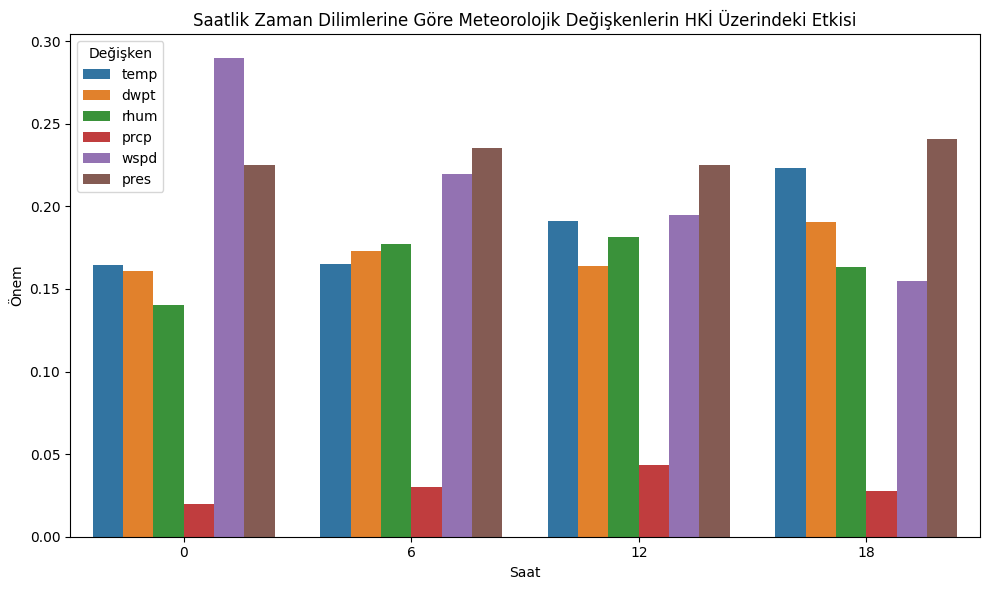

In [125]:
from sklearn.ensemble import RandomForestRegressor

# Saatlik bazda importance analizleri
hourly_results = []

for hour in [0, 6, 12, 18]:
    subset = df[df['hour'] == hour]
    X = subset[['temp', 'dwpt', 'rhum', 'prcp', 'wspd', 'pres']]
    y = subset['hki_genel']

    if len(subset) > 100:
        model = RandomForestRegressor(random_state=42)
        model.fit(X, y)
        importances = model.feature_importances_
        hourly_results.append(pd.DataFrame({
            'Saat': hour,
            'Değişken': X.columns,
            'Önem': importances
        }))

importances_df = pd.concat(hourly_results)

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df, x='Saat', y='Önem', hue='Değişken')
plt.title("Saatlik Zaman Dilimlerine Göre Meteorolojik Değişkenlerin HKİ Üzerindeki Etkisi")
plt.tight_layout()
plt.show()


Gradient Boosting ile Meteorolojik Değişkenlerin HKİ Üzerindeki Etkisi

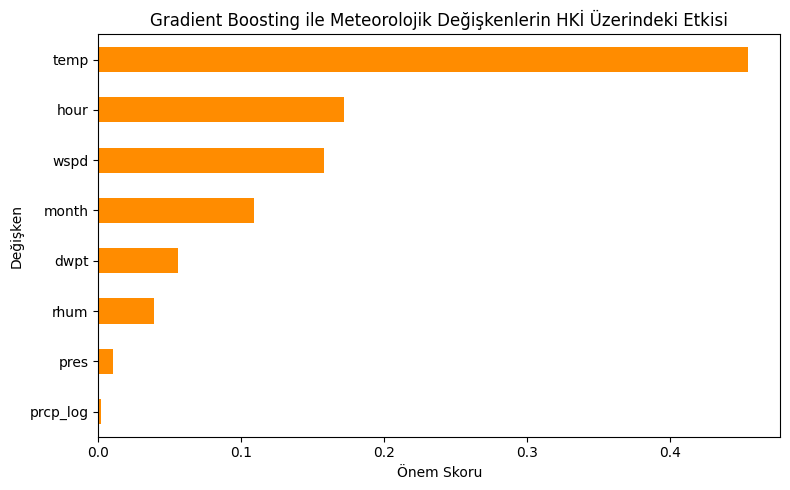

,0
prcp_log,0.001608
pres,0.010134
rhum,0.039230
dwpt,0.055727
month,0.108726
wspd,0.158011
hour,0.172173
temp,0.454391


In [162]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Meteorolojik değişkenleri ve hedef değişkeni tanımla
meteorolojik = ['temp', 'dwpt', 'rhum', 'wspd', 'pres',"hour", "month","prcp_log", ]
X = df[meteorolojik]
y = df['hki_o3']

# Eksik verileri çıkar
valid_idx = X.dropna().index
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Veriyi eğitim ve test olarak böl
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Gradient Boosting ile model oluştur
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr_model.fit(X_train, y_train)

# Önem skoru
importance = pd.Series(gbr_model.feature_importances_, index=X_train.columns).sort_values() # index=meteorolojik yerine X_train.columns kullanıldı

# Görselleştir
plt.figure(figsize=(8, 5))
importance.plot(kind='barh', color='darkorange')
plt.title("Gradient Boosting ile Meteorolojik Değişkenlerin HKİ Üzerindeki Etkisi")
plt.xlabel("Önem Skoru")
plt.ylabel("Değişken")
plt.tight_layout()
plt.show()

importance

In [163]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model tahmini
y_pred_gbr = gbr_model.predict(X_test)

# RMSE ve R² hesapla
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, r2_gbr

(np.float64(8.127670365583363), 0.5794208246866013)

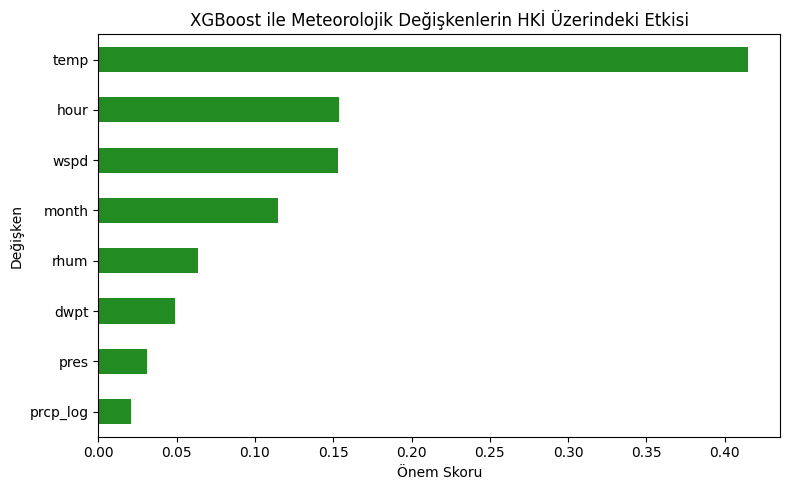

(np.float64(7.6723212236184315),
 0.6252262563510609,
 prcp_log    0.020835
 pres        0.030902
 dwpt        0.048830
 rhum        0.063685
 month       0.114516
 wspd        0.152987
 hour        0.153693
 temp        0.414552
 dtype: float32)

In [160]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Hedef ve özellik değişkenlerini belirleyelim
features  = ['temp', 'dwpt', 'rhum', 'wspd', 'pres',"hour", "month","prcp_log", ]
X = df[features]
y = df['hki_o3']

# Geçerli verilerle devam edelim
valid_idx = X.dropna().index
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Eğitim ve test kümeleri
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# XGBoost modelini eğit
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Tahmin yap ve performansı ölç
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

# Özellik önem derecelerini çıkar ve görselleştir
importances = pd.Series(xgb_model.feature_importances_, index=features).sort_values()

plt.figure(figsize=(8, 5))
importances.plot(kind='barh', color='forestgreen')
plt.title("XGBoost ile Meteorolojik Değişkenlerin HKİ Üzerindeki Etkisi")
plt.xlabel("Önem Skoru")
plt.ylabel("Değişken")
plt.tight_layout()
plt.show()

rmse_xgb, r2_xgb, importances

In [164]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model tahmini
y_pred_gbr = gbr_model.predict(X_test)

# RMSE ve R² hesapla
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

rmse_gbr, r2_gbr

(np.float64(8.127670365583363), 0.5794208246866013)

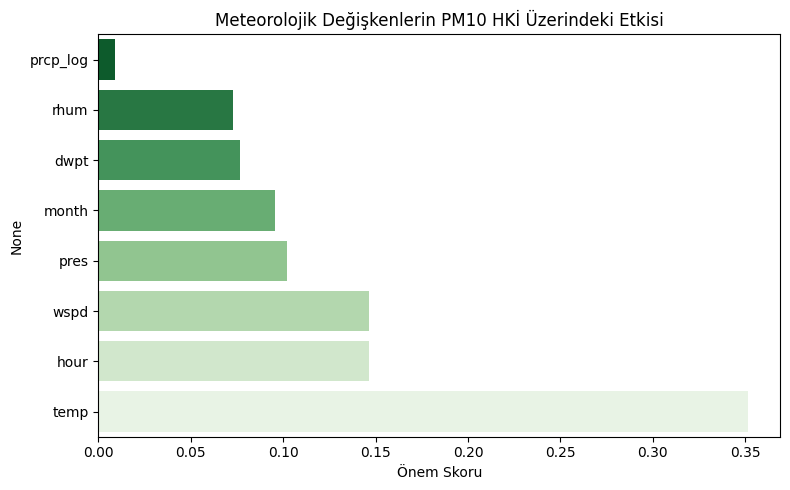

🔢 RMSE: 7.40
📈 R²: 0.651


In [159]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Özellikler ve hedef değişken
meteorolojik = ['temp', 'dwpt', 'rhum', 'wspd', 'pres',"hour", "month","prcp_log", ]
X = df[meteorolojik]
y = df['hki_o3']

# Eksik verileri düşür
valid_idx = X.dropna().index
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve performans
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Özellik önem skoru
importances = pd.Series(model.feature_importances_, index=meteorolojik).sort_values()

# Görselleştirme
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index, palette='Greens_r')
plt.title("Meteorolojik Değişkenlerin PM10 HKİ Üzerindeki Etkisi")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()

print(f"🔢 RMSE: {rmse:.2f}")
print(f"📈 R²: {r2:.3f}")


🔢 RMSE (Root Mean Squared Error): 7.40
Bu değer, PM10’a ait HKİ tahminlerinin gerçek değerlerden ortalama ±7.4 birim saptığını gösterir.

PM10 için HKİ sınıfları genellikle 50 puan aralıklarla tanımlandığı için bu hata:

🔍 İyi, Orta, Hassas gibi alt kategoriler arasında ayrım yaparken oldukça başarılı tahminler yapılabileceğini gösterir.

📈 R² (Determinasyon Katsayısı): 0.651
Bu skor, meteorolojik ve varsa ek özniteliklerin HKİ üzerindeki etkisini %65 oranında açıklayabildiğini gösterir.

Modelin veri içerisindeki örüntüleri güçlü şekilde öğrendiğini ve genellenebilir bir yapıya sahip olduğunu ifade eder.

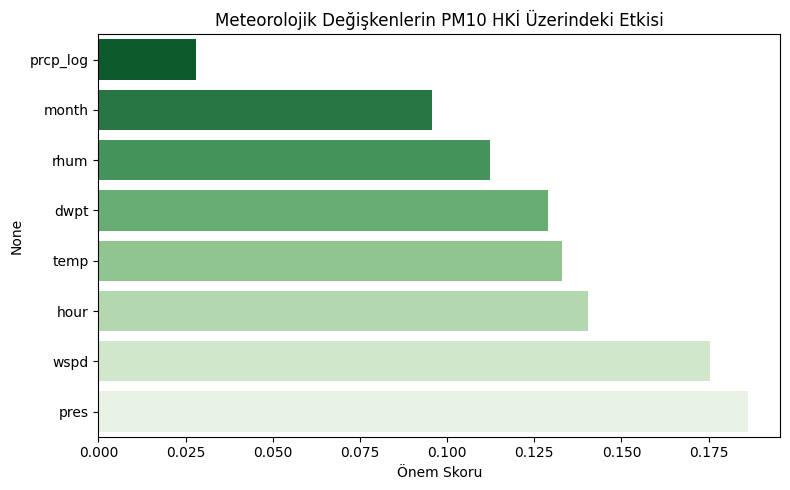

🔢 RMSE: 18.30
📈 R²: 0.374


In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Özellikler ve hedef değişken
meteorolojik = ['temp', 'dwpt', 'rhum', 'wspd', 'pres',"hour", "month","prcp_log", ]
X = df[meteorolojik]
y = df['hki_pm10']

# Eksik verileri düşür
valid_idx = X.dropna().index
X = X.loc[valid_idx]
y = y.loc[valid_idx]

# Eğitim ve test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve performans
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Özellik önem skoru
importances = pd.Series(model.feature_importances_, index=meteorolojik).sort_values()

# Görselleştirme
plt.figure(figsize=(8, 5))
sns.barplot(x=importances.values, y=importances.index, palette='Greens_r')
plt.title("Meteorolojik Değişkenlerin PM10 HKİ Üzerindeki Etkisi")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()

print(f"🔢 RMSE: {rmse:.2f}")
print(f"📈 R²: {r2:.3f}")


# Model Seçimi

 Model seçimi ve
hiperparametre
optimizasyonu
tavsiyeleri al1n1r. En
uygun model belirlenir.
